# Assignment3

จัดทำโดย 

ณัชณศา เลิศมหากูล 65340500021

อนวัช อนุสุเรนทร์ 65340500056

ชัญญาภัค ทรัพย์สวัสดิ์กุล 65340500067

## Reference Dataset

https://archive.ics.uci.edu/dataset/880/support2

ชุดข้อมูลนี้ประกอบด้วยผู้ป่วยวิกฤต 9,105 รายจากศูนย์การแพทย์ 5 แห่งในสหรัฐอเมริกา โดยแต่ละแถวจะเกี่ยวข้องกับบันทึกผู้ป่วยในโรงพยาบาลที่ตรงตามเกณฑ์การรวมและการคัดออกสำหรับโรค 9 ประเภท ได้แก่ ภาวะหายใจล้มเหลวเฉียบพลัน โรคปอดอุดกั้นเรื้อรัง หัวใจล้มเหลว โรคตับ โคม่า มะเร็งลำไส้ใหญ่ มะเร็งปอด ระบบอวัยวะหลายส่วนล้มเหลวร่วมกับมะเร็ง และระบบอวัยวะหลายส่วนล้มเหลวร่วมกับการติดเชื้อในกระแสเลือด

# 1.Reading the data and data description (ทำความเข้าใจ Data)

### Data Description

**Data Types Feature**

**Continuous** : ข้อมูลเชิงตัวเลขที่เป็นค่าต่อเนื่องที่แสดงถึงการวัดต่าง ๆ ได้แก่
  - ประชากรศาสตร์และสภาพร่างกาย: อายุ (`age`), คะแนนทางการแพทย์ เช่น คะแนนโคม่า (`scoma`), คะแนนสรีรวิทยา SUPPORT (`sps`), คะแนน APACHE III (`aps`)
  - ค่าชีวภาพที่วัดในวันที่ 3: ความดันโลหิตเฉลี่ย (`meanbp`), อัตราการเต้นหัวใจ (`hrt`), อัตราการหายใจ (`resp`), อุณหภูมิ (`temp`), อัตราส่วนออกซิเจน PaO2/FiO2 (`pafi`), อัลบูมิน (`alb`), บิลิรูบิน (`bili`), ครีเอตินีน (`crea`), โซเดียม (`sod`), ความเป็นกรดด่างของเลือด (`ph`), ปริมาณปัสสาวะ (`urine`)
  - การประเมินการอยู่รอด: การประเมินการอยู่รอดใน 2 เดือน (`surv2m`) และ 6 เดือน (`surv6m`), ประมาณการของแพทย์ใน 2 เดือน (`prg2m`) และ 6 เดือน (`prg6m`)
  - ต้นทุนและค่ารักษาพยาบาล: ค่าใช้จ่ายในโรงพยาบาล (`charges`), อัตราส่วนต้นทุน (`totcst`), ต้นทุนย่อย (`totmcst`)

**Categorical** : ข้อมูลที่เป็นหมวดหมู่ได้แก่
  - ประชากรศาสตร์: เพศ (`sex`), เชื้อชาติ (`race`), หมวดหมู่โรค (`dzgroup`, `dzclass`), รายได้ (`income`), จำนวนปีการศึกษา (`edu`)
  - ประวัติการเจ็บป่วยและคำสั่งการรักษา: เบาหวาน (`diabetes`), สมองเสื่อม (`dementia`), มะเร็ง (`ca`), คำสั่ง DNR (`dnr`)

**Integer** : ข้อมูลเชิงจำนวนเต็ม ได้แก่
  - วันและจำนวนการเข้ารักษา: จำนวนวันที่อยู่ในโรงพยาบาล (`hday`), จำนวนวันที่เข้าร่วมการศึกษา (`slos`), จำนวนวันติดตามผล (`d.time`)
  - การตรวจทางชีวภาพ: จำนวนเม็ดเลือดขาว (`wblc`), ระดับน้ำตาลกลูโคส (`glucose`), ระดับไนโตรเจนยูเรียในเลือด (`bun`)

หมายเหตุ : มีทั้งหมด 48 Feature


### Import library

In [41]:
# Fetch a dataset from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# Functions for statistical computations, such as Box-Cox transformation
from scipy.stats import boxcox

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Imputation methods for filling in missing values (SimpleImputer and KNNImputer)
from sklearn.impute import SimpleImputer, KNNImputer

# Encode categorical variables into numeric labels
from sklearn.preprocessing import LabelEncoder

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Scaling features to a given range (e.g., 0 to 1)
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter tuning using grid search with cross-validation
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using Randomized Search
from sklearn.model_selection import RandomizedSearchCV

# Performance metrics for classification tasks
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

# Perform cross-validation
from sklearn.model_selection import cross_val_score

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions and utilities (e.g., Z-scores, normality tests)
from scipy import stats

# Core library for data manipulation and analysis
import pandas as pd

# Numeric computations (e.g., arrays, matrices, mathematical functions)
import numpy as np

# Utilities for handling files and directories
import shutil
import os

# Machine learning models from Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Calculate the accuracy of a model's predictions
from sklearn.metrics import accuracy_score

# Hyperparameter tuning using Bayesian Search
from skopt import BayesSearchCV

from skopt.space import Real, Integer, Categorical


### Import Data

In [14]:
# Fetch dataset 
support2 = fetch_ucirepo(id=880) 

X = support2.data.features 
y = support2.data.targets 

# Combine features and targets into a single DataFrame, if desired
df = pd.concat([X, y], axis=1)

# metadata 
print(support2.metadata) 

# variable information 
print(support2.variables)

df = pd.read_csv('data.csv', header = None)
df.columns = ['id','age','death','sex','hospdead','slos','d.time','dzgroup','dzclass','num.co','edu','income','scoma','charges','totcst','totmcst','avtisst','race','sps','aps','surv2m','surv6m','hday','diabetes','dementia','ca','prg2m','prg6m','dnr','dnrday','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','adlp','adls','sfdm2','adlsc']
num_columns = len(df.columns)
print(f"จำนวนคอลัมน์ทั้งหมด: {num_columns}")
df.head()

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

id       age  death     sex  hospdead  slos  d.time      dzgroup  \
0  id       age  death     sex  hospdead  slos  d.time      dzgroup   
1   1  62.84998      0    male         0     5    2029  Lung Cancer   
2   2  60.33899      1  female         1     4       4    Cirrhosis   
3   3  52.74698      1  female         0    17      47    Cirrhosis   
4   4  42.38498      1  female         0     3     133  Lung Cancer   

              dzclass  num.co  ...        crea  sod        ph  glucose  bun  \
0             dzclass  num.co  ...        crea  sod        ph  glucose  bun   
1              Cancer       0  ...  1.19995117  141  7.459961      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...         5.5  132      7.25      NaN  NaN   
3  COPD/CHF/Cirrhosis       2  ...           2  134  7.459961      NaN  NaN   
4              Cancer       2  ...  0.79992676  139       NaN      NaN  NaN   

   urine  adlp  adls                sfdm2  adlsc  
0  urine  adlp  adls                sfdm2  adlsc  
1    NaN     7     7                  NaN      7  
2    NaN   NaN     1     <2 mo. follow-up      1  
3    NaN     1     0     <2 mo. follow-up      0  
4    NaN     0     0  no(M2 and SIP pres)      0  

[5 rows x 48 columns]

## 2.Defining the problem 
 
เป้าหมาย คือ การเรียนรู้จากข้อมูลนี้และคาดการณ์การเสียชีวิตของผู้ป่วย
โดยสร้างแบบจำลองการพยากรณ์จากข้อมูลต่างๆของผู้ป่วยที่มีแนวโน้มเสียชีวิต

วัตถุประสงค์ คือ ความสามารถในการทำนายนี้จะช่วยให้แพทย์และทีมผู้ดูแลสามารถวางแผนการรักษาที่เหมาะสมและจัดลำดับความสำคัญของผู้ป่วยที่มีความเสี่ยงสูงได้อย่างรวดเร็ว ซึ่งเป็นปัจจัยสำคัญที่ช่วยเพิ่มโอกาสการรอดชีวิตและลดการสูญเสียทรัพยากรที่ไม่จำเป็น

**Target Variable:** "death"
- death=0 หมายถึง ไม่เสียชีวิต
- death=1 หมายถึง เสียชีวิต

**Predictions:** age, sex, scoma, adls, adlsc, num.co etc.
 
**Samples:** ผู้ป่วยที่จะเสียชีวิต

## 3.The distribution of Target

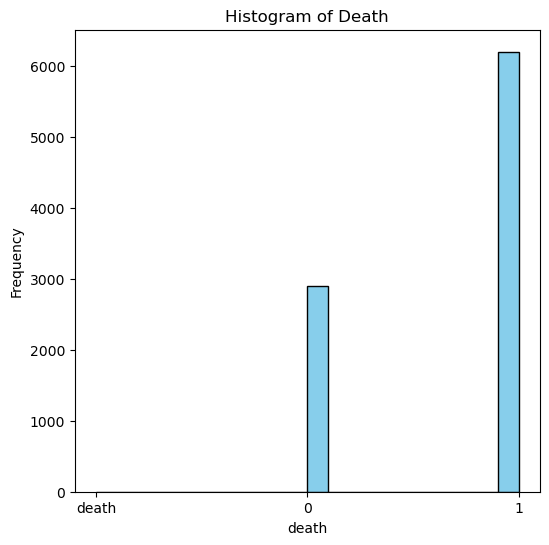

In [15]:
# Plotting Histogram for the 'death' column
plt.figure(figsize=(6, 6))
plt.hist(df['death'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Death')
plt.xlabel('death')
plt.ylabel('Frequency')
plt.show()

From the graph it can be seen that there is a slight left skew, but there are enough number of rows for death=0 as well death=1 for the ML algorithms to learn.

# 4.Basic Data Exploration (การสำรวจข้อมูลเบื้องต้น)

### 4.1 สำรวจประเภทของข้อมูล และจำนวน Missing Value ของแต่ละ Feature

| Data      | Type         | Description                                       | Missing Value( จาก 9100)|
|-----------|--------------|---------------------------------------------------|-------------------------|
| age       | Continuous   | อายุ                                              | no                       |
| sex       | Categorical  | เพศ                                              | no                       |
| dzgroup   | Categorical  | หมวดหมู่ย่อยโรคของผู้ป่วย                             | no                       |
| dzclass   | Categorical  | หมวดหมู่โรคของผู้ป่วย                                | no                       |
| num.co    | Continuous   | จำนวนโรคที่ผู้ป่วยเป็นอยู่ตอนนี้                          | no                       |     
| edu       | Categorical  | จำนวนปีที่มีการศึกษา                                 | yes (1634)               |
| income    | Categorical  | รายได้ของผู้ป่วย                                     | yes (2982)               |
| scoma     | Continuous   | คะแนนความโคม่า                                    | yes (1)                  |
| charges   | Continuous   | ค่าใช้จ่ายในโรงพยาบาล                               | yes (172)                |
| totcst    | Continuous   | อัตราส่วนรวมของต้นทุนต่อค่าใช้จ่าย                       | yes (888)               |
| totmcst   | Continuous   | ต้นทุนการจ่ายต่อเดือน                                 | yes (3475)              |
| avtisst   | Continuous   | ราคาจุลภาคทั้งหมด                                   | yes (82)                |
| race      | Categorical  | เชื้อชาติ                                            | yes (42)                |
| sps       | Continuous   | สนับสนุนคะแนนสรีรวิทยาในวันที่ 3                        | yes (1)                 |
| aps       | Continuous   | คะแนนสรีรวิทยา                                     | yes (1)                 |
| surv2m    | Continuous   | การอยู่รอดใน 2 เดือน ประเมินในวันที่ 3                   | yes (1)                 |
| surv6m    | Continuous   | การอยู่รอดใน 6 เดือน ประเมินในวันที่ 3                   | yes (1)                 |
| hday      | Integer      | วันที่ผู้ป่วยอยู่ในโรงพยาบาล                             | no                      |
| diabetes  | Categorical  | เป็นเบาหวาน?                                       | no                      |
| dementia  | Categorical  | สมองเสื่อม                                         | no                      |
| prg2m     | Continuous   | ประมาณการการอยู่รอด 2 เดือนของแพทย์สำหรับผู้ป่วย        | yes (1649)              |
| prg6m     | Categorical  | ประมาณการการอยู่รอด 6 เดือนของแพทย์สำหรับผู้ป่วย        | yes (1633)              |
| dnr       | Categorical  | อยู่ในคิวที่ต้องกู้ชีพหรือไม่                              | yes (30)                |
| dnrday    | Continuous   | วันที่จะกู้ชีพ                                         | yes (30)                |
| meanbp    | Continuous   | ค่าเฉลี่ยความดันโลหิตหลอดเลือดแดงของผู้ป่วยวัดในวันที่ 3     | yes (1)                 |
| wblc      | Continuous   | จำนวนเม็ดเลือดขาว (เป็นพันเม็ด) ที่วัดได้ในวันที่ 3          | yes (212)               |
| hrt       | Continuous   | อัตราการเต้นของหัวใจของผู้ป่วยที่วัดในวันที่ 3               | yes (1)                 |
| resp      | Continuous   | อัตราการหายใจของผู้ป่วยที่วัดในวันที่ 3                    | yes (1)                 |
| temp      | Continuous   | อุณหภูมิเป็นองศาเซลเซียสวัดในวันที่ 3                    | no                      |
| pafi      | Continuous   | PaO2/FiO2 Ratio                                  | yes (2325)              |
| alb       | Continuous   | ระดับ serum albumin ในวันที่ 3                       | yes (3372)              |
| bili      | Continuous   | ระดับ bilirubin จากการวัดในวันที่ 3                   | yes (2601)              |
| crea      | Continuous   | ระดับ serum creatinine จากการประเมินในวันที่ 3         | yes (67)                |
| sod       | Continuous   | ความเข้มข้นของโซเดียมในซีรั่มในวันที่ 3                   | yes (1)                 |
| ph        | Continuous   | ความเป็นกรดของเลือด                                 | yes (2284)              |
| glucose   | Integer      | ระดับของ Glucose ในวันที่ 3                          | yes (4500)              |
| bun       | Integer      | ระดับไนโตรเจนยูเรียในเลือดวัดในวันที่ 3                   | yes (4352)              |
| urine     | Integer      | ปริมาณปัสสาวะของผู้ป่วยในวันที่ 3                       | yes (4862)              |
| adlp      | Categorical  | ดัชนีการดำรงชีวิตประจำวัน (ADL) ของผู้ป่วย               | yes (5641)              |
| adls      | Continuous   | ดัชนีกิจกรรมการดำรงชีวิตประจำวัน (ADL)                  | yes (2867)              |
| adlsc     | Continuous   | ADL ที่นำมาใส่ได้รับการปรับเทียบให้เป็นตัวแทน              | no                      |
| death     | Continuous   | ตาย                                              | no                      |
| hospdead  | Binary       | ตายที่โรงพยาบาล?                                   | no                      |
| sfdm2     | Categorical  | ระดับความพิการของผู้ป่วย ระดับ 5 หนักสุด                 | yes (1400)              |

#### สรุป 2.1 
- จะเห็นว่าบ้างดาต้ามี Missing Value เยอะมากถึงเกือบ 50 % ของดาต้าทั้งหมดที่มี ซึ่งอาจจะทำให้ไม่สามารถเติม Missing Value ได้จึงต้องคัดออกในครั้งแรกก่อน


### 4.2การสรุปสถิติ  
ใช้สถิติพื้นฐานเพื่อทำความเข้าใจข้อมูล เช่น ค่ามัธยฐาน ค่าสูงสุด และค่าเฉลี่ย


ข้อมูลเชิงตัวเลข (Continuous และ Integer)

| Data           | Mean      | Std. Dev  | Min       | 25%       | 50%       | 75%       | Max         |
|----------------|-----------|-----------|-----------|-----------|-----------|-----------|-------------|
| age            | 62.65     | 15.59     | 18.04     | 52.80     | 64.86     | 73.99     | 101.85      |
| num.co         | 1.87      | 1.34      | 0         | 1         | 2         | 3         | 9           |
| edu            | 11.75     | 3.45      | 0         | 10        | 12        | 14        | 31          |
| scoma          | 12.06     | 24.64     | 0         | 0         | 0         | 9         | 100         |
| charges        | 59,995.79 | 102,648.8 | 1,169     | 9,740     | 25,024    | 64,598    | 1,435,423   |
| totcst         | 30,825.87 | 45,780.82 | 0         | 5,929.57  | 14,452.73 | 36,087.94 | 633,212     |
| totmcst        | 28,828.88 | 43,604.26 | -102.72   | 5,177.40  | 13,223.50 | 34,223.60 | 710,682     |
| avtisst        | 22.61     | 13.23     | 1         | 12        | 19.5      | 31.67     | 83          |
| sps            | 25.53     | 9.90      | 0.20      | 19        | 23.90     | 30.20     | 99.19       |
| aps            | 37.60     | 19.90     | 0         | 23        | 34        | 49        | 143         |
| surv2m         | 0.49      | 0.50      | 0         | 0         | 0         | 1         | 1           |
| surv6m         | 0.28      | 0.45      | 0         | 0         | 0         | 1         | 1           |
| hday           | 8.43      | 7.61      | 0         | 3         | 6         | 13        | 30          |
| meanbp         | 137.57    | 6.03      | 110       | 134       | 137       | 141       | 181         |
| wblc           | 11.22     | 11.36     | 0         | 6.3       | 8.8       | 13.3      | 200         |
| hrt            | 86.67     | 19.18     | 0         | 76        | 85        | 95        | 300         |
| resp           | 19.61     | 5.35      | 0         | 17        | 20        | 22        | 90          |
| temp           | 36.96     | 0.99      | 28.89     | 36.50     | 36.94     | 37.39     | 41.67       |
| pafi           | 282.22    | 101.35    | 0         | 216       | 288       | 354       | 890.38      |
| alb            | 2.86      | 0.59      | 0.2       | 2.6       | 2.9       | 3.2       | 29          |
| bili           | 1.66      | 2.26      | 0         | 0.6       | 1.0       | 1.9       | 63          |
| crea           | 1.68      | 1.47      | 0         | 0.9       | 1.3       | 2.0       | 21.5        |
| sod            | 137.57    | 6.03      | 110       | 134       | 137       | 141       | 181         |
| ph             | 7.42      | 0.08      | 6.83      | 7.38      | 7.42      | 7.47      | 7.77        |
| glucose        | 159.87    | 88.39     | 0         | 103       | 135       | 188       | 1092        |
| bun            | 32.35     | 26.79     | 1         | 14        | 23        | 42        | 300         |
| urine          | 2191.55   | 1455.25   | 0         | 1165.5    | 1968      | 3000      | 9000        |
| adlp           | 1.16      | 1.74      | 0         | 0         | 0         | 2         | 7           |
| adls           | 1.64      | 2.23      | 0         | 0         | 1         | 3         | 7           |
| adlsc          | 1.89      | 2.00      | 0         | 0         | 1         | 3         | 7.07        |
| death          | 0.68      | 0.47      | 0         | 0         | 1         | 1         | 1           |
| hospdead       | 0.26      | 0.44      | 0         | 0         | 0         | 1         | 1           |


การกระจายของข้อมูลเชิงหมวดหมู่ (Categorical)

| Categorical Data | Category              | Count |
|------------------|-----------------------|-------|
| sex              | male                  | 5125  |
|                  | female                | 3980  |
| dzgroup          | ARF/MOSF w/Sepsis     | 3515  |
|                  | CHF                   | 1387  |
|                  | COPD                  | 967   |
|                  | Lung Cancer           | 908   |
|                  | MOSF w/Malig          | 712   |
|                  | Coma                  | 596   |
|                  | Colon Cancer          | 512   |
|                  | Cirrhosis             | 508   |
| dzclass          | ARF/MOSF              | 4227  |
|                  | COPD/CHF/Cirrhosis    | 2862  |
|                  | Cancer                | 1420  |
|                  | Coma                  | 596   |
| income           | under $11k            | 2855  |
|                  | $11-$25k              | 1527  |
|                  | $25-$50k              | 1057  |
|                  | >$50k                 | 684   |
| race             | white                 | 7191  |
|                  | black                 | 1391  |
|                  | hispanic              | 290   |
|                  | other                 | 112   |
|                  | asian                 | 79    |
| ca               | no                    | 5995  |
|                  | metastatic            | 1858  |
|                  | yes                   | 1252  |
| dnr              | no dnr                | 5880  |
|                  | dnr after sadm        | 2956  |
|                  | dnr before sadm       | 239   |
| sfdm2            | <2 mo. follow-up      | 3123  |
|                  | no(M2 and SIP pres)   | 3061  |
|                  | adl>=4 (>=5 if sur)   | 916   |
|                  | SIP>=30               | 564   |
|                  | Coma or Intub         | 41    |



#### สรุป 2.2.

จากตารางข้อมูลเชิงตัวเลขจะเห็นว่ามีบางข้อมูลไม่เป็นจริง มี Outliner ที่เห็นได้ชัดอยู่ซึ่งหากไม่จัดการ Outliner ให้เรียบร้อยอาจจะส่งผลต่อการเติม Missing Value

- totmcst :ต้นทุนการจ่ายต่อเดือนไม่ควรมีค่าติดลบได้ แต่ว่า Min กลับเป็น -102.72
- glucose : ระดับน้ำตาลในเลือดมีค่าต่ำสุดเป็น 0 ซึ่งเป็นไปไม่ได้ในทางชีวภาพเพราะผู้ป่วยจะต้องมีระดับน้ำตาลในเลือดบางค่า ค่านี้อาจเกิดจากการขาดข้อมูลหรือข้อผิดพลาดในการวัด
- resp : อัตราการหายใจ มีค่าต่ำสุดเป็น 0 ซึ่งเป็นไปไม่ได้เนื่องจากหมายถึงหยุดหายใจ ควรตรวจสอบว่าข้อมูลนี้เกิดจากข้อผิดพลาดในการบันทึกหรือไม่
- wblc :จำนวนเม็ดเลือดขาว มีค่าอยู่ในช่วงกว้างมาก ค่าสูงสุดอยู่ที่ 200 ซึ่งเกินกว่าช่วงปกติของจำนวนเม็ดเลือดขาว (ปกติควรอยู่ระหว่าง 4-11 x 10^3 ต่อไมโครลิตร) อาจเกิดจากผู้ป่วยที่มีภาวะอักเสบขั้นรุนแรงหรือการบันทึกข้อมูลผิดพลาด
- bun : ระดับไนโตรเจนยูเรียในเลือดวัดในวันที่ 3 มี type ข้อมูลไม่ตรง และมีข้อมูลที่มากเกินกว่าความเป็นจริง

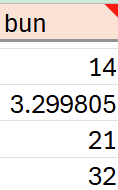 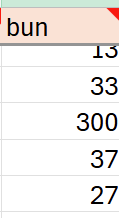

#### Cleaning Data

**จาก2.1**
- ตัด column ที่มี missing value มากกว่า 40% และตัด row ที่มี missing value มากกว่า 30% เพราะปริมาณข้อมูลที่สูญหายมากเกินไป 
จึงไม่สามารถใช้วิธีนำมาเติม Missing Value ได้


โดยจะตัด Columm
- bun
- glucose
- adlp
- urine

ตัด row 2 row


ดังนั้นปัจจุบันจะเหลือ 37 feature

In [16]:
# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)
print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)
print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")
print("\nข้อมูลตัวอย่างหลังการลบ:")

#ปริ้นตารางมาเช็ค
df.head()


cols_before :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')
cols_After :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc'],
      dtype='object')
คอลัมน์ที่ถูกลบ:
{'urine', 

id       age  death     sex  hospdead  slos  d.time      dzgroup  \
0  id       age  death     sex  hospdead  slos  d.time      dzgroup   
1   1  62.84998      0    male         0     5    2029  Lung Cancer   
2   2  60.33899      1  female         1     4       4    Cirrhosis   
3   3  52.74698      1  female         0    17      47    Cirrhosis   
4   4  42.38498      1  female         0     3     133  Lung Cancer   

              dzclass  num.co  ...      temp       pafi        alb  \
0             dzclass  num.co  ...      temp       pafi        alb   
1              Cancer       0  ...        36        388  1.7998047   
2  COPD/CHF/Cirrhosis       2  ...  34.59375         98        NaN   
3  COPD/CHF/Cirrhosis       2  ...  37.39844  231.65625        NaN   
4              Cancer       2  ...        35        NaN        NaN   

         bili        crea  sod        ph  adls                sfdm2  adlsc  
0        bili        crea  sod        ph  adls                sfdm2  adlsc  
1  0.19998169  1.19995117  141  7.459961     7                  NaN      7  
2         NaN         5.5  132      7.25     1     <2 mo. follow-up      1  
3  2.19970703           2  134  7.459961     0     <2 mo. follow-up      0  
4         NaN  0.79992676  139       NaN     0  no(M2 and SIP pres)      0  

[5 rows x 44 columns]

# 3.Data Transformation and Extraction (การแปลงและการดึงข้อมูล)

จากการทำ Data Basic Exploration พบว่า

3.1. ข้อมูลมี Type ที่แตกต่างกันมากจึงควรจะแปลงให้อยู่ใน Type ที่สามารถใช้งานร่วมกันกับ Target Death ที่มี Type เป็น Continuous ได้

3.2 ข้อมูลมีความผิดพลาด หรือมี Outliner เช่น มีค่าติดลบที่ไม่ควรเกิดขึ้น ทำให้ควรกำจัดออกก่อนที่จะเติม Missing Value เพราะอาจทำให้การเติมผิดพลาดได้ 

3.3. ข้อมูลมีการขาดหาย ต้องเติมให้เรียบร้อยก่อนถึงจะนำข้อมูลมา Scaling ได้อย่างแม่นยำ

3.4. สเกลของข้อมูลแตกต่างกัน ยากต่อการนำไปวิเคราะห์


**ดังนั้นควรแปลงข้อมูลให้สามารถนำไปวิเคราะห์ต่อได้โดยมีขั้นตอนดังนี้*


### 3.1.เปลี่ยน Feature ที่ Data เป็นประเภท Catagorical เป็น Numerical

- เปลี่ยน data ที่ยังเป็น type อื่นที่ไม่ใช่  numeric ให้เป็น numeric เพื่อสามารถใช้งานร่วมกันกับ Target ได้

In [17]:
#เลือก Column ที่มั่นใจว่าไม่ใช่ Numeric
categorical_columns = ['sex','income','race','ca', 'dzgroup', 'dzclass', 'dnr' , 'sfdm2'] 
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder() # ใช้การ Encoder ในการแปลง
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(f"Categorical columns: {categorical_columns}")
df[categorical_columns].head()

Categorical columns: ['sex', 'income', 'race', 'ca', 'dzgroup', 'dzclass', 'dnr', 'sfdm2']


sex  income  race  ca  dzgroup  dzclass  dnr  sfdm2
0    2       3     5   0        8        4    0      6
1    1       0     4   1        6        2    4      4
2    0       0     6   2        3        1    3      0
3    0       5     6   2        3        1    4      0
4    0       5     6   1        6        2    4      5

- แปลง data ที่เป็น string ของตัวเลขให้เป็น numeric 

In [18]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลขทั้งหมด
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # แปลงเป็นตัวเลข ถ้าไม่สามารถแปลงได้จะกลายเป็น NaN


### 3.2. ตัดข้อมูลที่ไม่เหมาะสม และ Outliner ออก


- ตัดค่าที่เป็นไปไม่ได้ก่อน 



- ตรวจสอบ Feature ที่มี Outliner และนำค่าออกโดยใช้วิธี Standard Deviation-based Method


In [19]:
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

feature_columns = ['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup', 
                   'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
                   'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
                   'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
                   'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
                   'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

numeric_columns = data[feature_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
outlier_columns = numeric_columns.copy()
df_std = data.copy()

print("Standard Deviation-based Method")
for column in outlier_columns:
    mean = df_std[column].mean()
    std_dev = df_std[column].std()
    
    min_border = mean - 3 * std_dev
    max_border = mean + 3 * std_dev
    
    # ระบุแถวที่มีค่าเป็น Outliers
    outliers = df_std[(df_std[column] < min_border) | (df_std[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column '{column}'")
    
    # ลบแถวที่เป็น Outliers
    output = df_std.drop(outliers, inplace=True)

print("\nจำนวนแถวหลังจากลบ Outliers ด้วยวิธี Standard Deviation:", df_std.shape)

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_no_outliner.csv'
df_std.to_csv(output_file, index=False)
shutil.move('filled_no_outliner.csv', 'csv')
print(f"\nResults saved to {output_file}")

Standard Deviation-based Method
0 outliers detected in column 'id'
0 outliers detected in column 'age'
0 outliers detected in column 'death'
0 outliers detected in column 'sex'
0 outliers detected in column 'hospdead'
204 outliers detected in column 'slos'
0 outliers detected in column 'd.time'
0 outliers detected in column 'dzgroup'
1 outliers detected in column 'dzclass'
123 outliers detected in column 'num.co'
108 outliers detected in column 'edu'
0 outliers detected in column 'income'
433 outliers detected in column 'scoma'
167 outliers detected in column 'charges'
194 outliers detected in column 'totcst'
178 outliers detected in column 'totmcst'
59 outliers detected in column 'avtisst'
0 outliers detected in column 'race'
79 outliers detected in column 'sps'
61 outliers detected in column 'aps'
86 outliers detected in column 'surv2m'
0 outliers detected in column 'surv6m'
192 outliers detected in column 'hday'
0 outliers detected in column 'diabetes'
233 outliers detected in colum

Error: Destination path 'csv\filled_no_outliner.csv' already exists

- สรุปผลด้วย Box-Plot Graph ระหว่างที่มี outliers กับ ไม่มี 

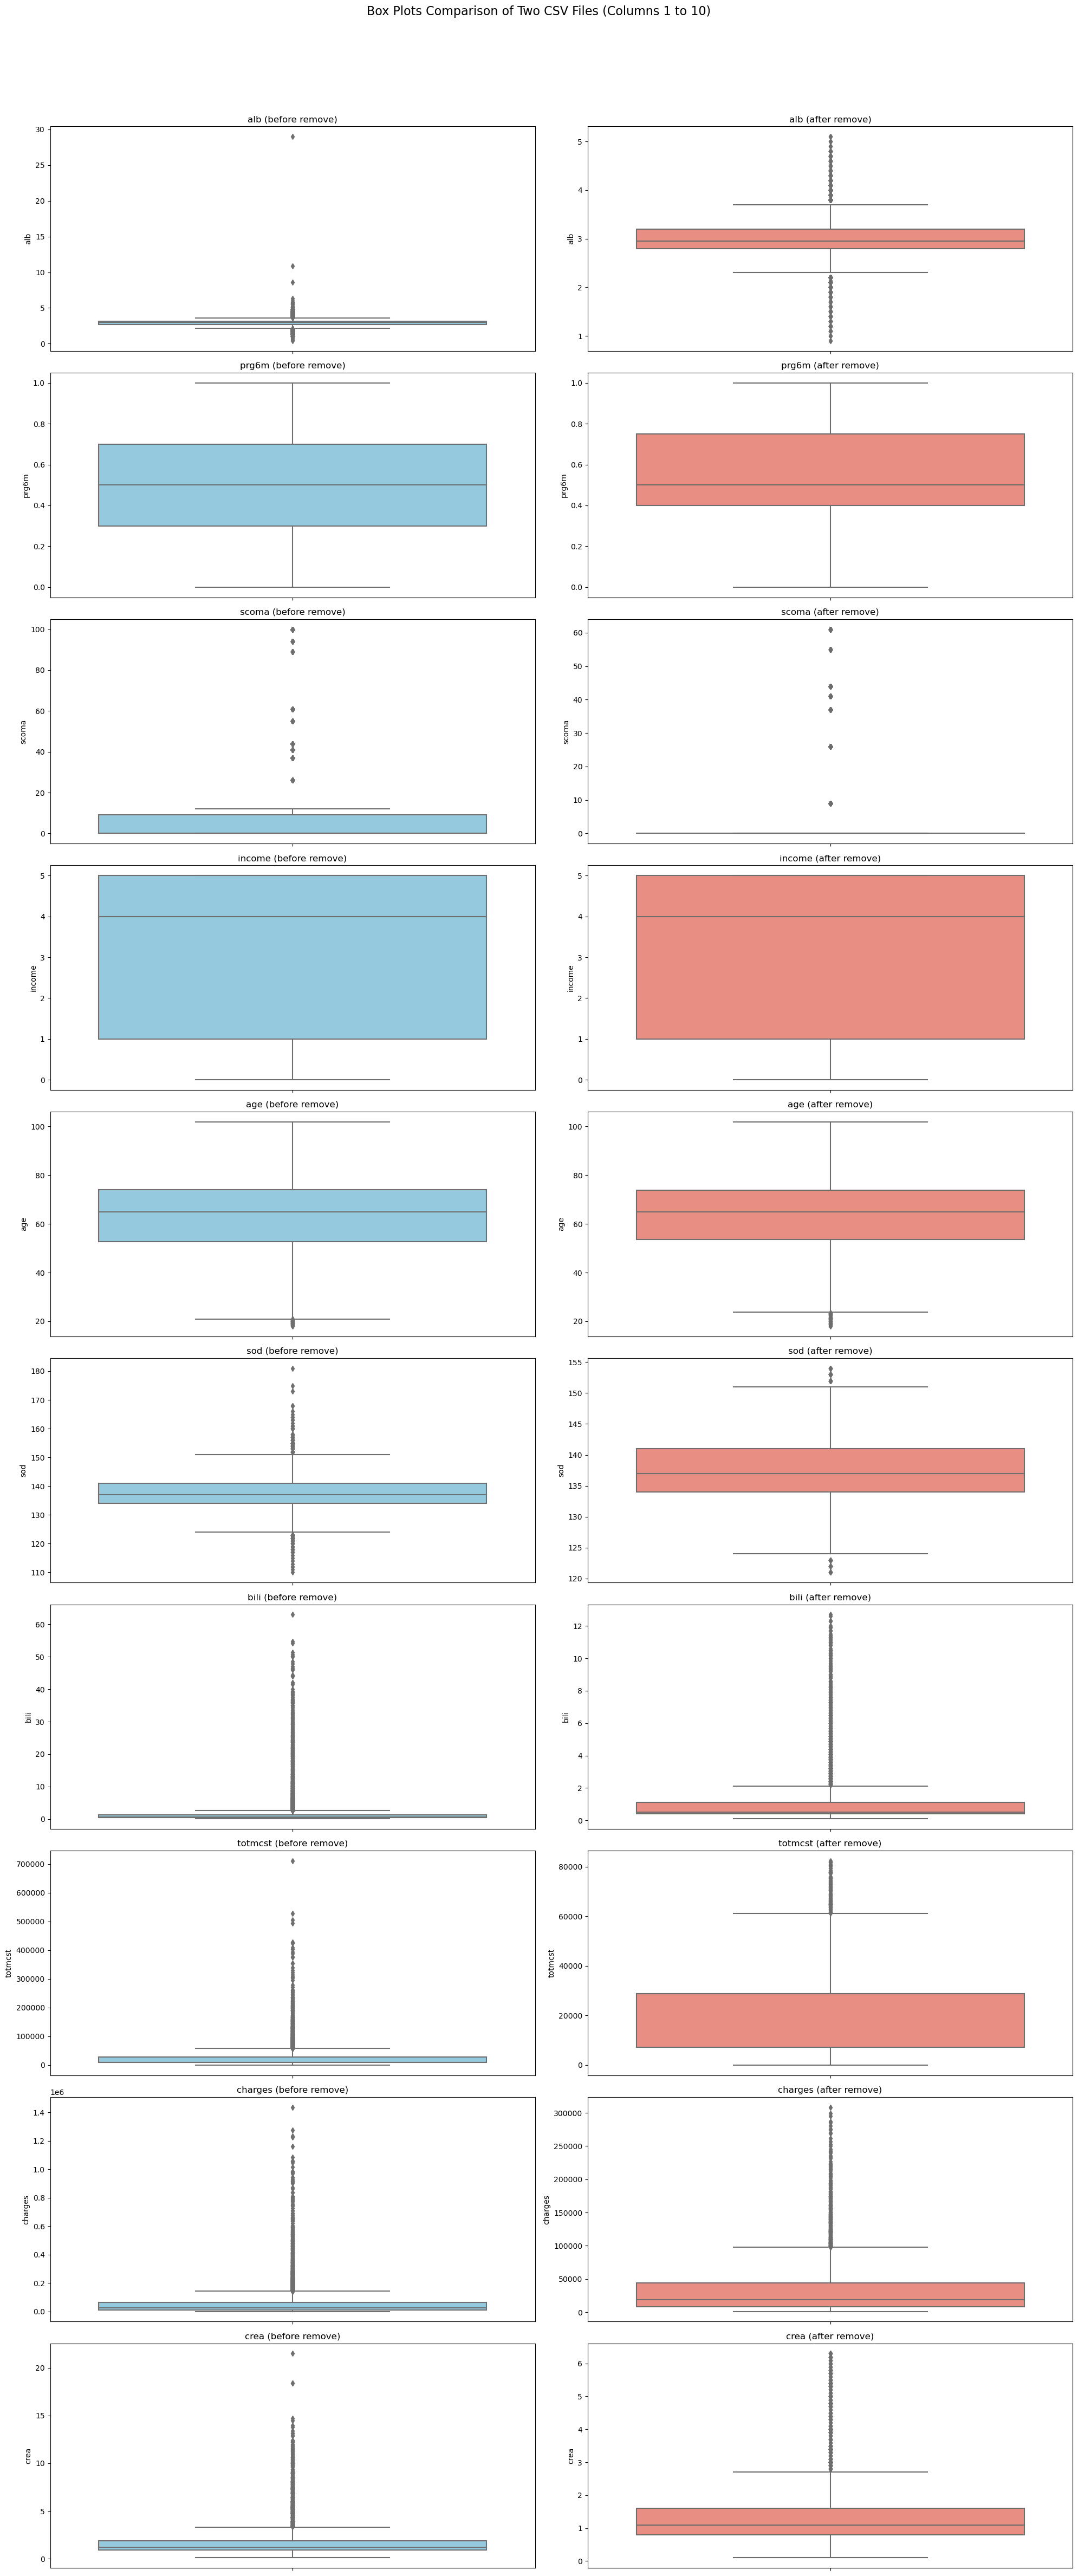

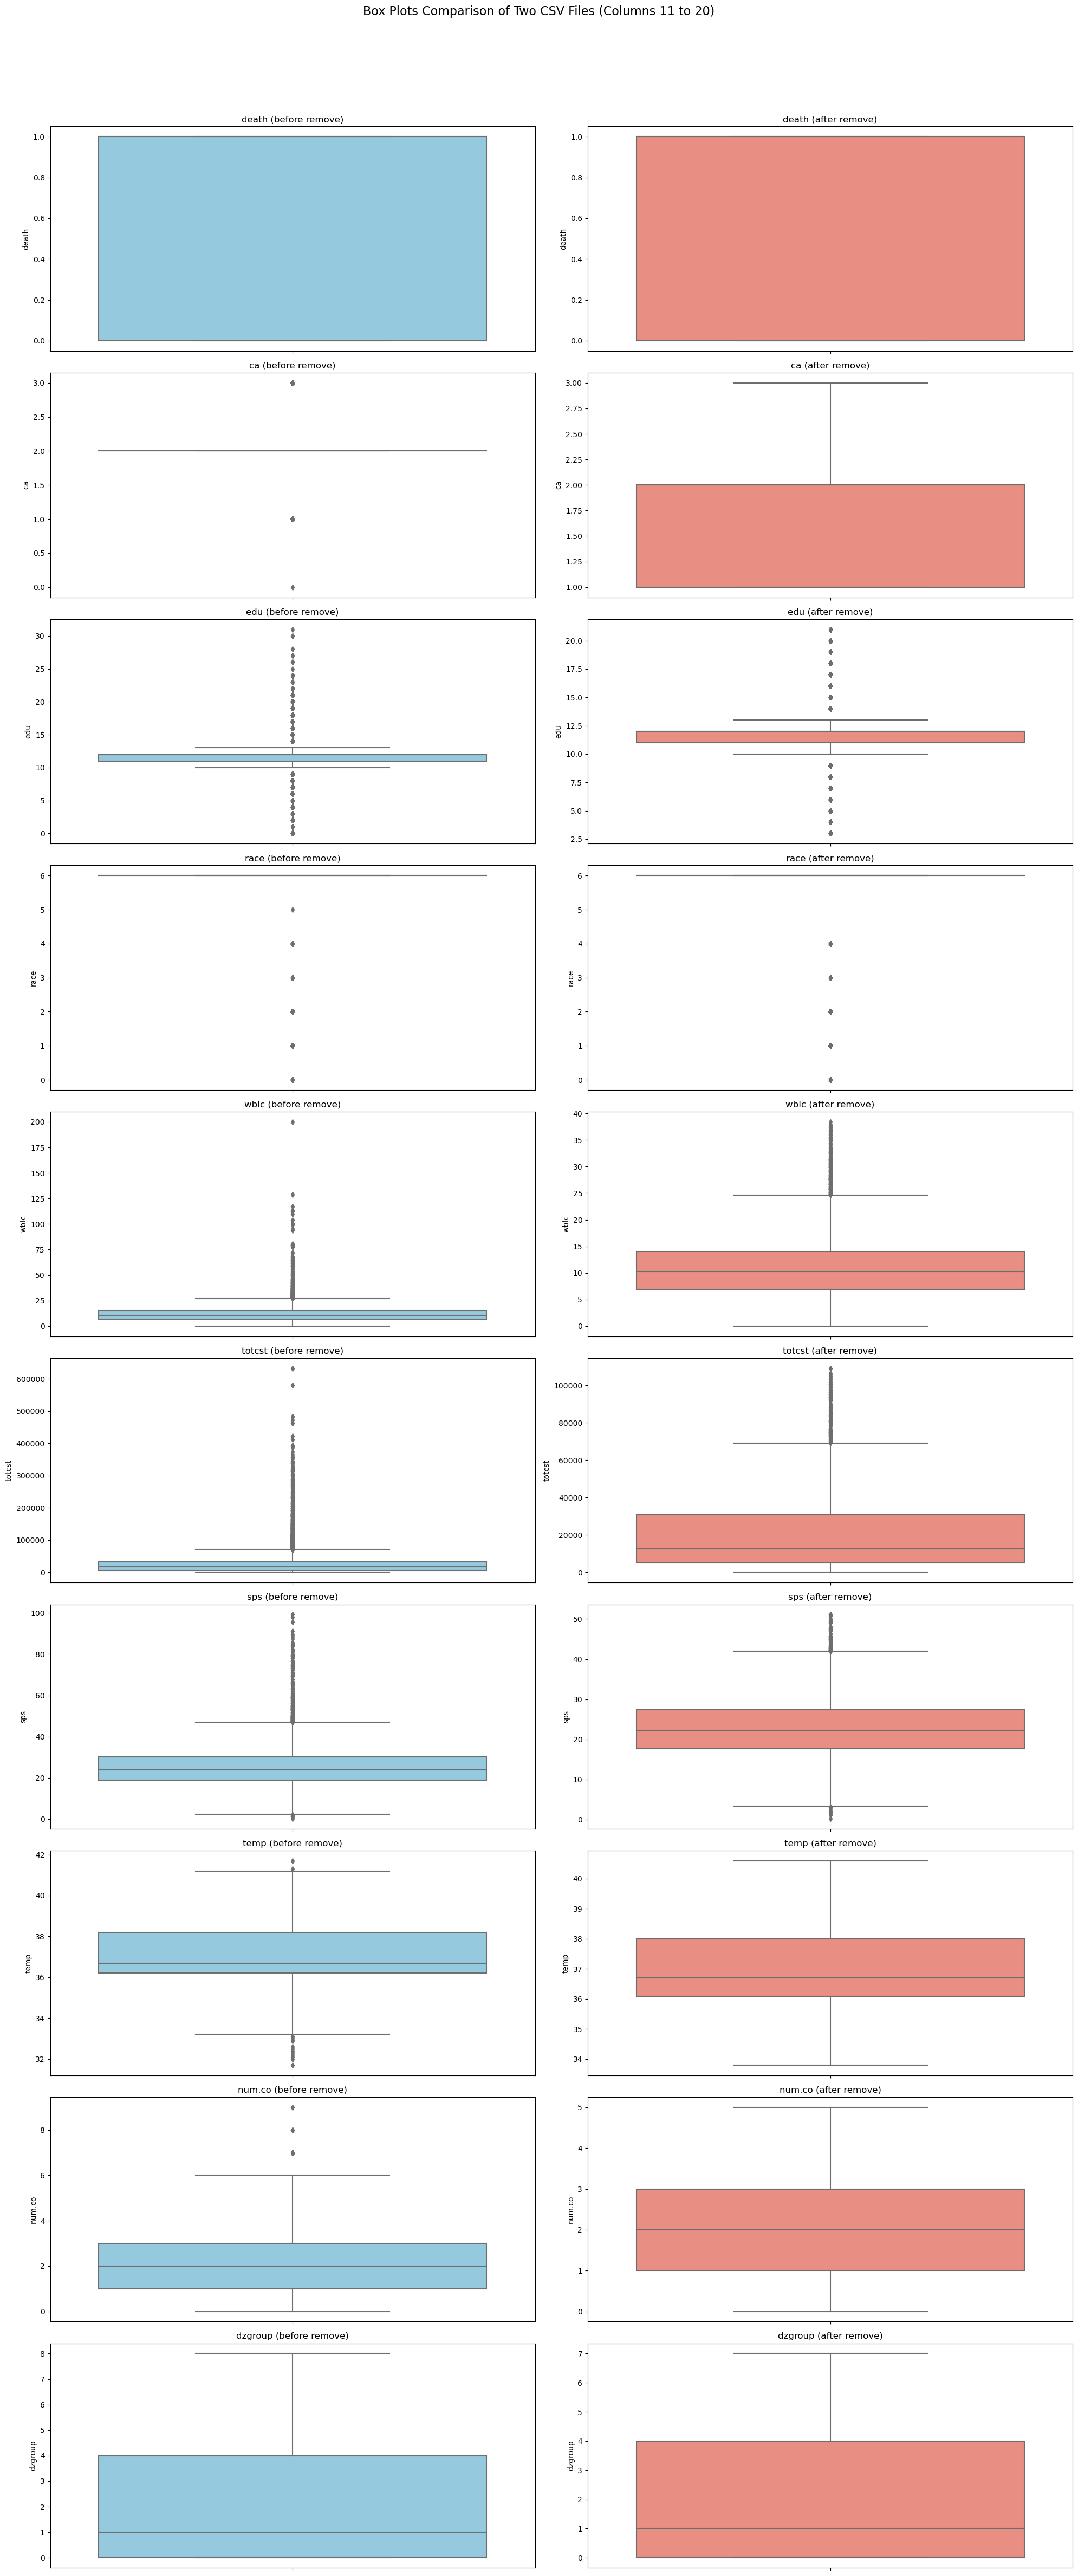

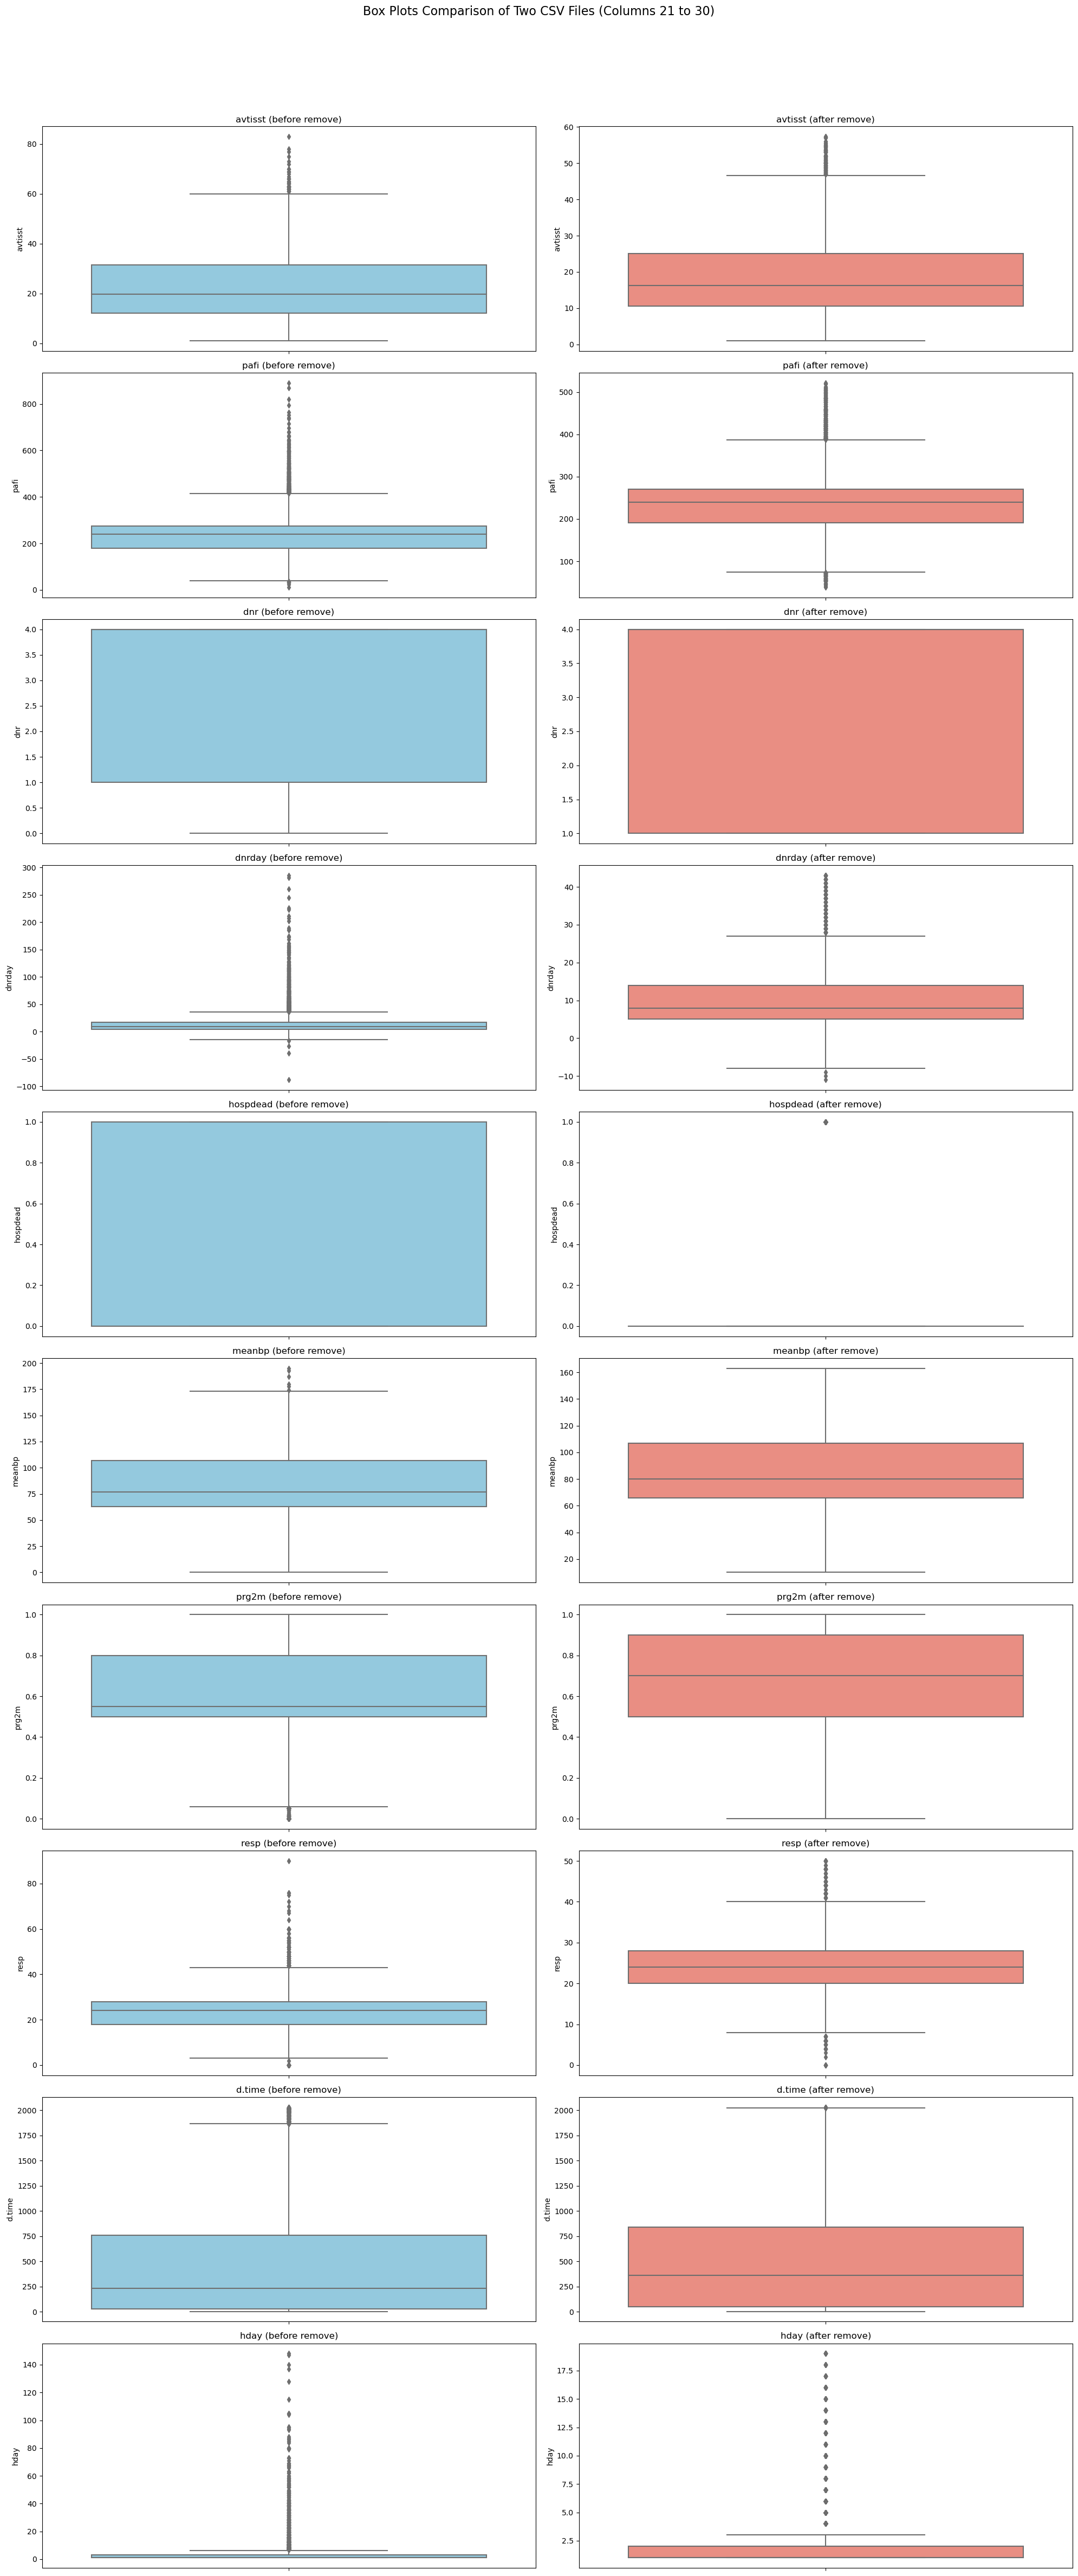

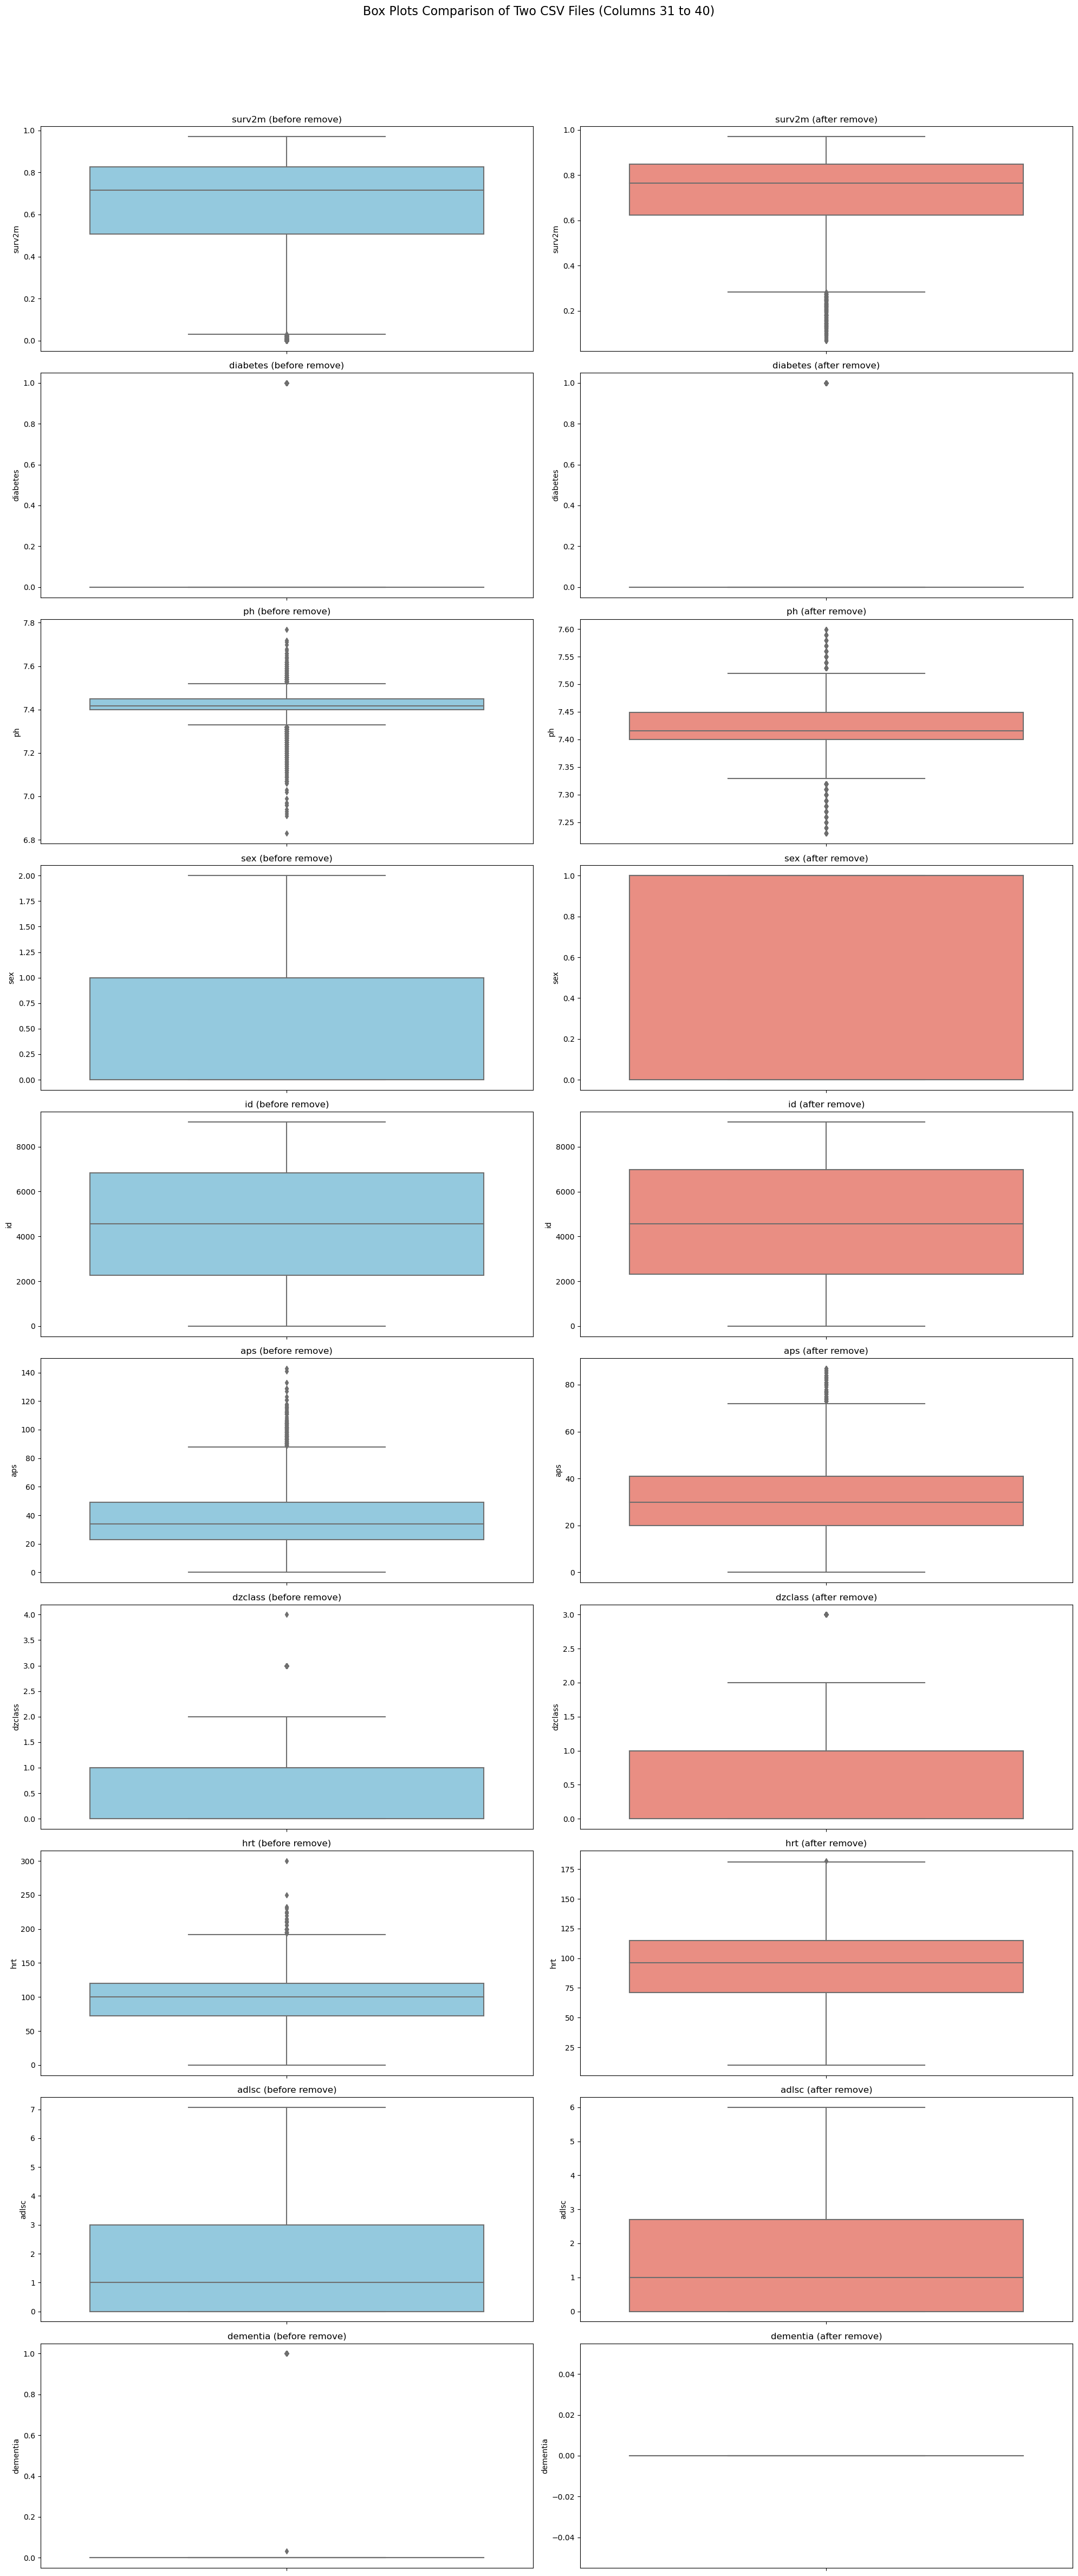

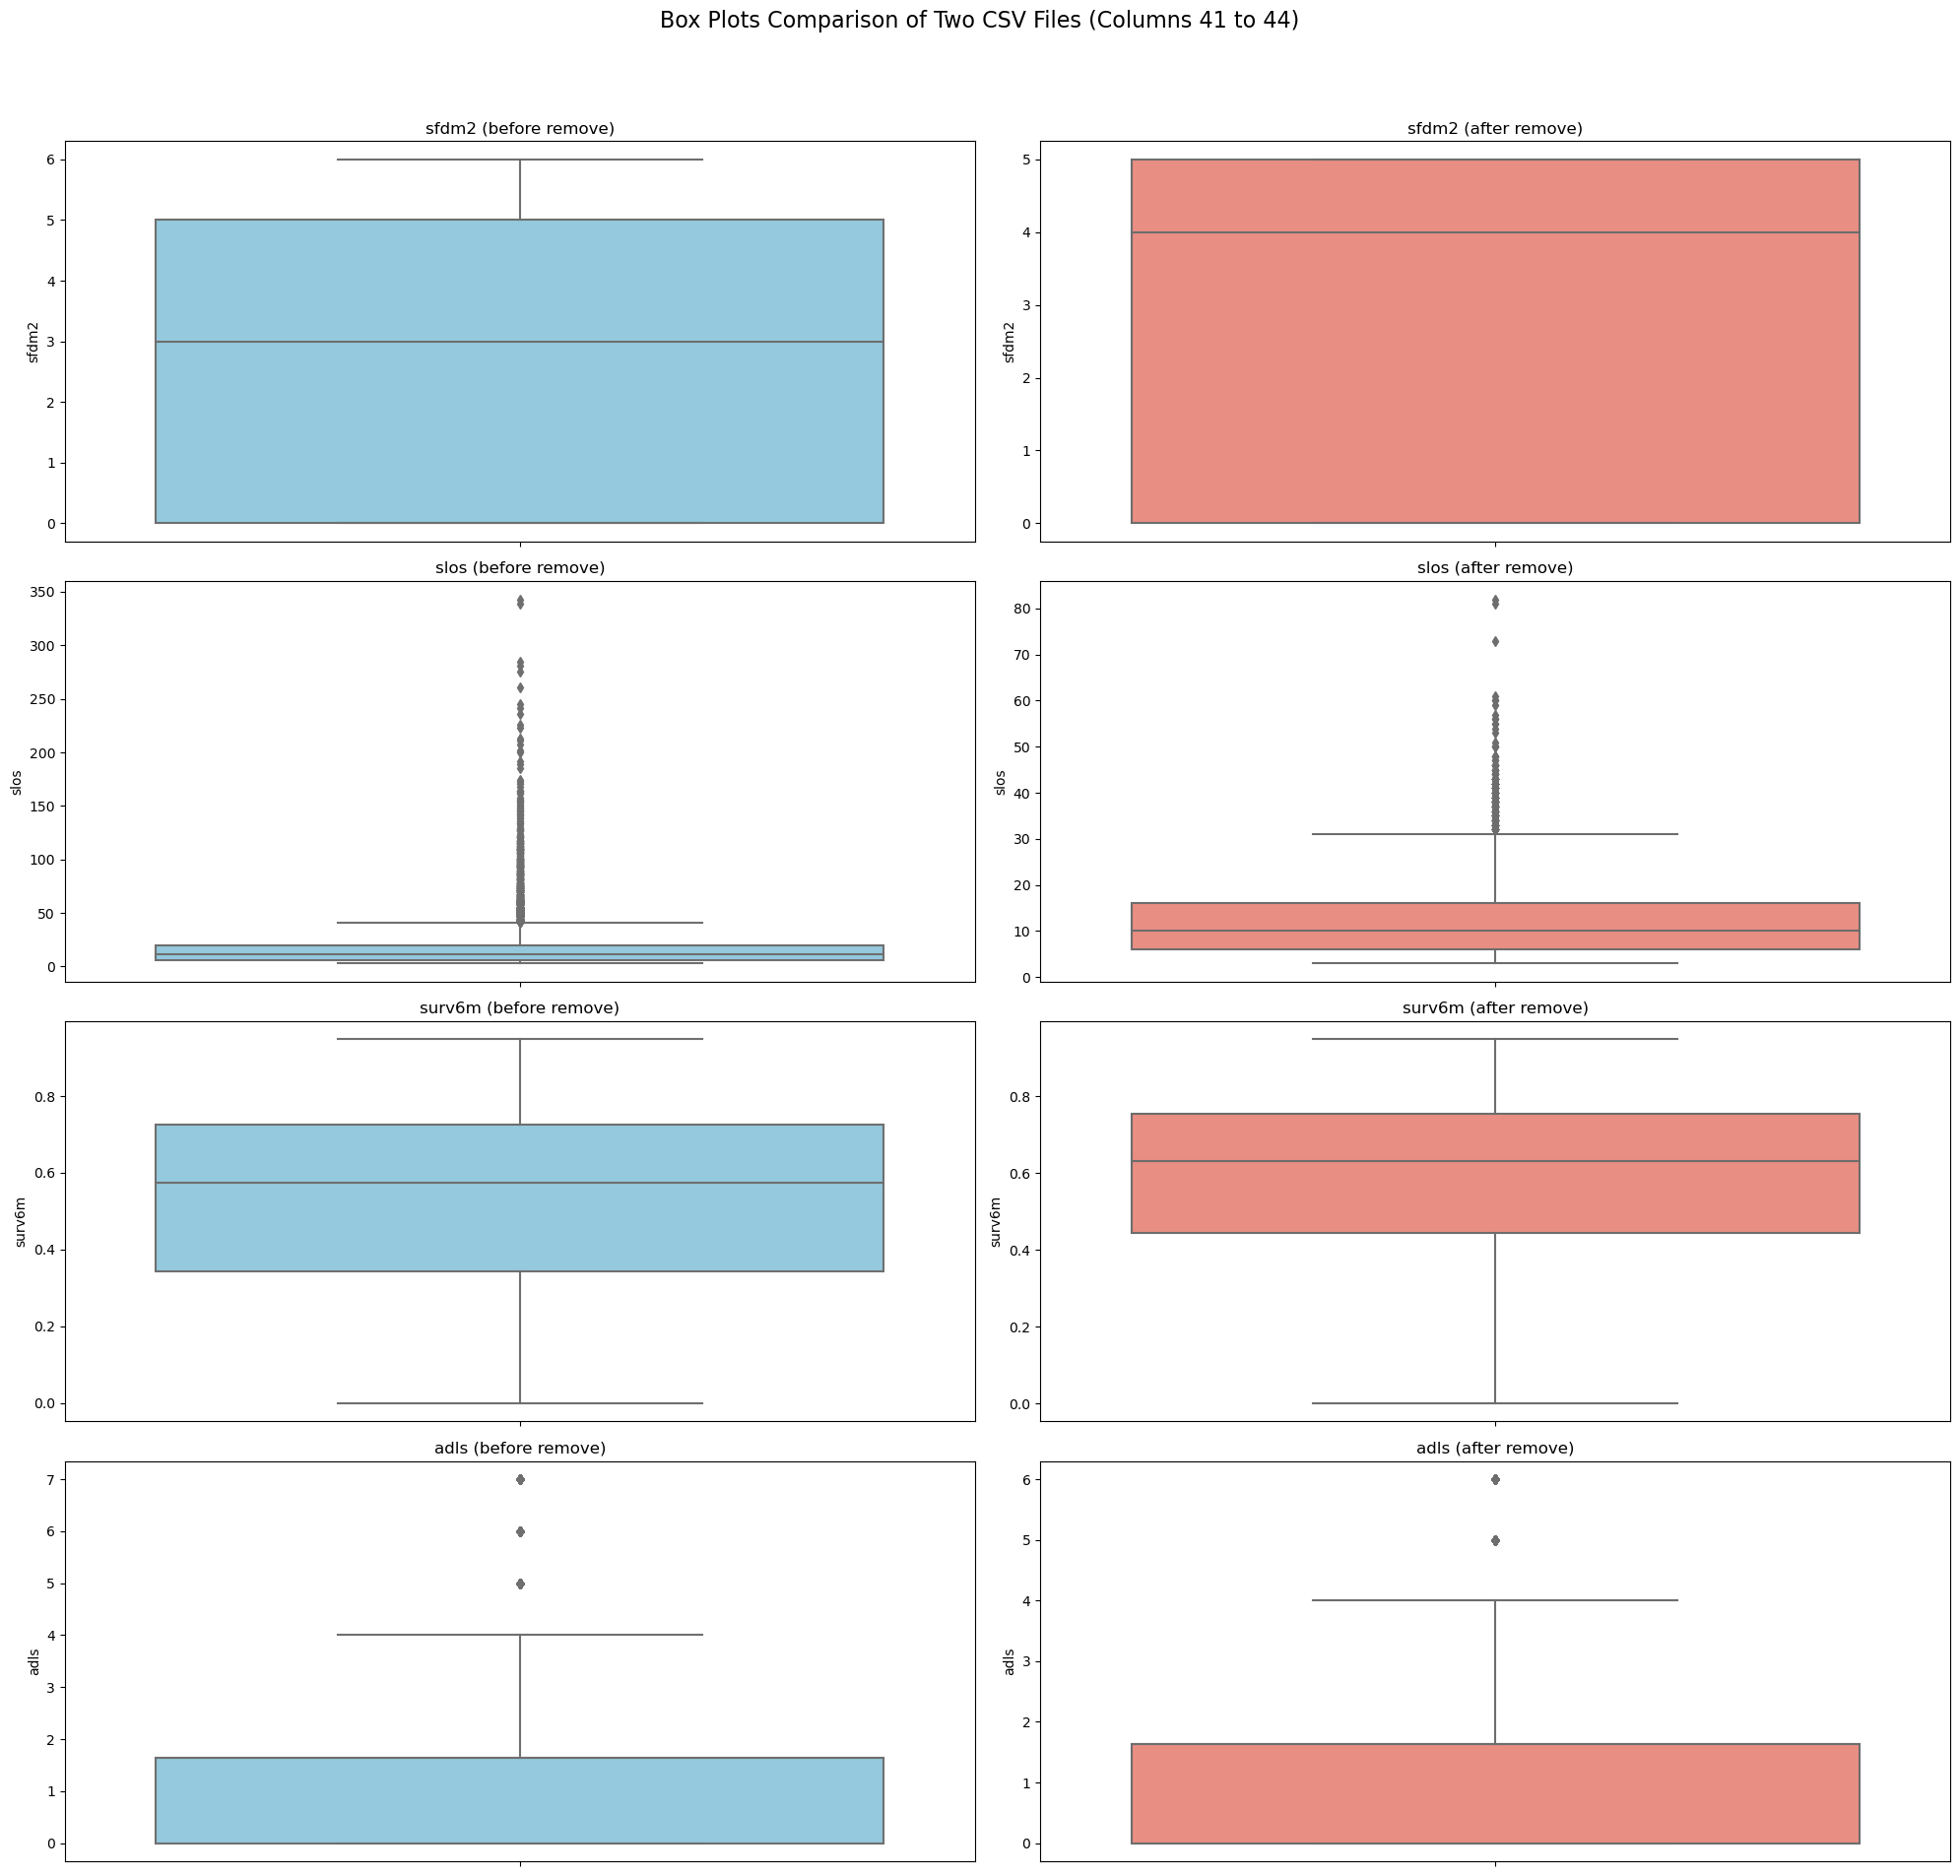

In [20]:
# Define directory for saving plots
plots_dir = './csv/plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Load the two CSV files into separate DataFrames
file_path1 = './filled_data.csv'  # Replace with your first CSV file path
file_path2 = './filled_no_outliner.csv'  # Replace with your second CSV file path
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Function to plot side-by-side box plots for comparison
def plot_boxplots_side_by_side(df1, df2, columns, title, filename_prefix):
    max_subplots = 20  # Strict limit for subplots (10 columns per figure)
    
    # Loop through columns in batches of 10 (20 subplots for side-by-side plots)
    for start in range(0, len(columns), max_subplots // 2):
        # Slice the columns for the current figure
        columns_slice = columns[start:start + max_subplots // 2]
        num_rows = len(columns_slice)  # One row per column
        
        plt.figure(figsize=(20, 5 * num_rows))
        
        for i, column in enumerate(columns_slice):
            # Box plot for the first CSV file
            plt.subplot(num_rows, 2, 2 * i + 1)
            sns.boxplot(y=df1[column], color='skyblue')
            plt.title(f'{column} (before remove)')
            
            # Box plot for the second CSV file
            plt.subplot(num_rows, 2, 2 * i + 2)
            sns.boxplot(y=df2[column], color='salmon')
            plt.title(f'{column} (after remove)')
        
        # Title and layout
        plt.suptitle(f'{title} (Columns {start + 1} to {start + len(columns_slice)})', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Save the figure with a unique filename based on the column range
        filename = f"{filename_prefix}_{start + 1}_to_{start + len(columns_slice)}.png"
        plt.savefig(os.path.join(plots_dir, filename))
        plt.show()

# Select common numeric columns in both DataFrames
common_numeric_columns = list(set(df1.select_dtypes(include='number').columns) & set(df2.select_dtypes(include='number').columns))

# Plot side-by-side box plots for comparison
plot_boxplots_side_by_side(df1, df2, common_numeric_columns, "Box Plots Comparison of Two CSV Files", 'boxplots_comparison')

### 3.3.เติม Missing Value 

จัดการข้อมูลที่หายไปโดยหา method ที่ดีที่สุดของแต่ละ column มาเติม Missing value ซึ่งประกอบด้วยวิธีดังนี้
- mean
- mode
- hot-deck
- Nearest Neighbor
- Regression(ใช้ไม่ได้เพราะทุกแถวมี Missing value หมดจึงหาแถวที่สมบูรณ์มาเทียบไม่ได้)


In [21]:
# ฟังก์ชันสำหรับ hot-deck imputation (ใช้ KNN)
def hot_deck_imputation(X_train, X_test):
    imputer = KNNImputer(n_neighbors=5)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    return X_train_imputed, X_test_imputed

In [22]:
def evaluate_imputation(method, df, target_col='charges'):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    
    X_train = df_train.drop(columns=[target_col])
    y_train = df_train[target_col]
    
    X_test = df_test.drop(columns=[target_col])
    y_test = df_test[target_col]
    
    # Handle missing values in the target variable
    y_train = pd.to_numeric(y_train, errors='coerce') 
    y_test = pd.to_numeric(y_test, errors='coerce')

    y_train = y_train.fillna(y_train.mean())
    y_test = y_test.fillna(y_test.mean())
    
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    elif method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
        
    elif method == 'hot_deck':
        # Hot-deck Imputation (Using KNN)
        X_train_imputed, X_test_imputed = hot_deck_imputation(X_train, X_test)
    
    elif method == 'nearest_neighbor':
        # Nearest Neighbor (KNNImputer)
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    else:
        raise ValueError(f"Unknown method: {method}")

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    # Predict and calculate MSE
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

- หา method ที่ดีที่สุดในการเติม missing value โดยดูจากค่า MSE ที่ต่ำที่สุด

In [23]:
# รายการวิธีการที่จะทดสอบ 
methods = ['mean', 'mode', 'hot_deck', 'nearest_neighbor']
results = {}

# สร้างสำเนาข้อมูลเพื่อเติมค่า
df_filled = df.copy()

for col in df.columns:
    print(f"\nTesting column: {col}")
    results[col] = {}

    # วนลูปทดสอบแต่ละวิธีการเติมค่าที่หายไป
    for method in methods:
        try:
            print(f"  Method: {method}")
            mse = evaluate_imputation(method, df, target_col=col)
            results[col][method] = mse
            print(f"    MSE: {mse}")
        except ValueError as e:
            print(f"    Error with method {method}: {e}")

    # หาวิธีที่ดีที่สุดที่มีค่า MSE ต่ำที่สุด
    best_method = min(results[col], key=results[col].get)
    print(f"Best method for {col}: {best_method}")

    # เติมค่า Missing Value ใน df_filled สำหรับคอลัมน์นั้นด้วยวิธีที่ดีที่สุด
    if best_method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif best_method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
    elif best_method == 'hot_deck':
        imputer = KNNImputer(n_neighbors=5)
    elif best_method == 'nearest_neighbor':
        imputer = KNNImputer(n_neighbors=5)

    # เติมค่าในคอลัมน์นั้นๆ
    df_filled[col] = df_filled[col].mask(df_filled[col].isna(), imputer.fit_transform(df[[col]]).flatten())

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_data.csv'
df_filled.to_csv(output_file, index=False)
shutil.move('filled_data.csv', 'csv')
print(f"\nCompleted filling missing values. Results saved to {output_file}")


Testing column: id
  Method: mean


NameError: name 'mean_squared_error' is not defined

### 3.4.ทำ Normalization เพื่อทำให้ Feature อยู่ในช่วงเดียวกันทั้งหมด ทำให้ง่ายต่อการทำ Model ขึ้น

- จัดการกราฟให้มีการกระจายตัวที่ดีขึ้น ประกอบด้วย 3 วิธี คือ Log ,Squre Root และBox-Cox Method โดยเลือกใช้วิธีที่ได้ค่า skewness ใกล้เคียงกับ 0 มากที่สุด 


--- Column: age ---
Best transformation for age: Box-Cox (Skewness: -0.09)

--- Column: slos ---
Best transformation for slos: Box-Cox (Skewness: 0.02)

--- Column: d.time ---
Best transformation for d.time: Box-Cox (Skewness: -0.17)

--- Column: dzgroup ---
Best transformation for dzgroup: Square Root (Skewness: 0.02)

--- Column: dzclass ---
Best transformation for dzclass: Log (Skewness: -0.00)

--- Column: num.co ---
Best transformation for num.co: Log (Skewness: -0.44)

--- Column: edu ---
Best transformation for edu: Box-Cox (Skewness: 0.09)

--- Column: income ---
Best transformation for income: Log (Skewness: -0.98)

--- Column: scoma ---
Best transformation for scoma: Log (Skewness: 1.73)

--- Column: charges ---
Best transformation for charges: Box-Cox (Skewness: 0.01)

--- Column: totcst ---
Best transformation for totcst: Square Root (Skewness: 0.68)

--- Column: totmcst ---
Best transformation for totmcst: Square Root (Skewness: -0.27)

--- Column: avtisst ---
Best transf

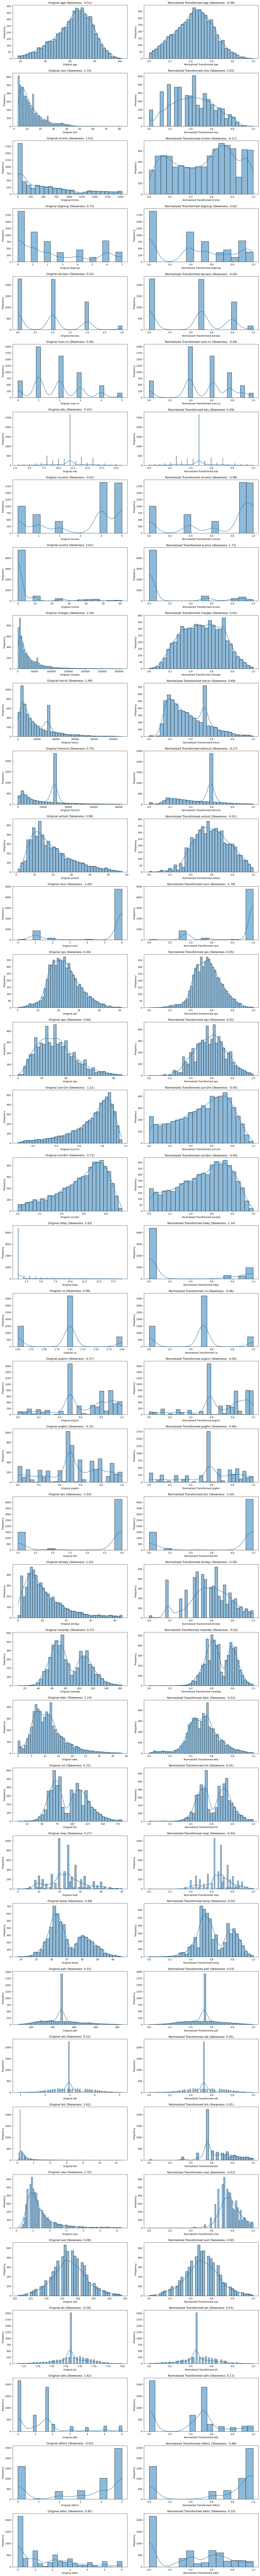

Normalized data saved to ./csv/normalizedd_data.csv


In [24]:
file_path = './csv/filled_no_outliner.csv'
data = pd.read_csv(file_path)

columns_to_transform = ['age', 'slos', 'd.time', 'dzgroup', 
                        'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
                        'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
                        'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
                        'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
                        'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

# ฟังก์ชันในการประเมิน skewness และ plot
def plot_and_evaluate(column_data, title, ax):
    skewness = column_data.skew()
    sns.histplot(column_data.dropna(), kde=True, ax=ax)
    ax.set_title(f'{title} (Skewness: {skewness:.2f})')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')
    return skewness

# สร้าง MinMaxScaler เพื่อ Normalize ข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# ฟังก์ชันในการ Normalize ข้อมูล (min-max scaling)
def normalize(column_data):
    # fit_transform ข้อมูลโดยใช้ MinMaxScaler โดยข้ามค่า NaN
    normalized = scaler.fit_transform(column_data.values.reshape(-1, 1))
    # แปลงกลับเป็น 1D (flatten) และคืนค่าเป็น pandas Series พร้อมกับ index เดิม
    return pd.Series(normalized.flatten(), index=column_data.index)

# เตรียม Dictionary เพื่อเก็บข้อมูลที่ Normalize แล้ว
normalized_data_dict = {}

# ตั้งค่า grid ของ subplots
rows = len(columns_to_transform)
fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows))
fig.tight_layout(pad=4.0)

# วนลูปผ่านแต่ละคอลัมน์และทำการแปลง
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        print(f"\n--- Column: {column} ---")
        
        column_data = data[column].copy()
        
        mask = column_data >= 0
        
        if mask.any():
            # Plot ข้อมูลต้นฉบับ
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data[mask], f'Original {column}', ax_original)
            
            # ทำการแปลงต่างๆ
            log_transformed_data = pd.Series(np.log1p(column_data[mask]), index=column_data[mask].index)
            sqrt_transformed_data = pd.Series(np.sqrt(column_data[mask]), index=column_data[mask].index)
            
            # Box-Cox ต้องการค่ามากกว่า 0
            try:
                boxcox_transformed_data, _ = stats.boxcox(column_data[mask])
                boxcox_transformed_data = pd.Series(boxcox_transformed_data, index=column_data[mask].index)
                boxcox_skewness = boxcox_transformed_data.skew()
            except ValueError:
                boxcox_transformed_data = pd.Series(np.nan, index=column_data[mask].index)
                boxcox_skewness = np.nan
            
            # คำนวณ skewness
            skew_log = log_transformed_data.skew()
            skew_sqrt = sqrt_transformed_data.skew()
            skew_boxcox = boxcox_skewness
            
            skewness_values = {
                'Log': skew_log,
                'Square Root': skew_sqrt,
                'Box-Cox': skew_boxcox
            }
            
            # เลือกวิธีที่ skewness ใกล้เคียงกับ 0 มากที่สุด
            best_transformation = min(
                [k for k in skewness_values if not np.isnan(skewness_values[k])],
                key=lambda k: abs(skewness_values[k])
            )
            
            print(f"Best transformation for {column}: {best_transformation} (Skewness: {skewness_values[best_transformation]:.2f})")
            
            # เลือกข้อมูลที่ถูกแปลงดีที่สุด
            if best_transformation == 'Log':
                best_transformed_data = log_transformed_data
            elif best_transformation == 'Square Root':
                best_transformed_data = sqrt_transformed_data
            elif best_transformation == 'Box-Cox':
                best_transformed_data = boxcox_transformed_data
            
            # สร้าง Series สำหรับการแปลงทั้งหมด โดยแทนที่เฉพาะค่าที่มากกว่า 0
            transformed_full = pd.Series(np.nan, index=column_data.index)
            transformed_full[mask] = best_transformed_data
            
            # นำข้อมูลที่ถูกแปลงดีที่สุดแล้วมา normalize ให้อยู่ในช่วง 0-1
            normalized_data = normalize(transformed_full)
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลที่ Normalize แล้ว
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized Transformed {column}', ax_norm)
        
        else:
            print(f"Skipping column '{column}' because it has no positive values.")
    else:
        print(f"Column '{column}' not found in the dataset.")

plt.show()

# สร้าง DataFrame จาก normalized_data_dict
normalized_df = pd.DataFrame(normalized_data_dict)

final_data = data.copy()
for column in normalized_data_dict:
    final_data[column] = normalized_df[column]

# บันทึกข้อมูลลงในไฟล์ CSV
output_file_path = './csv/normalizedd_data.csv'
final_data.to_csv(output_file_path, index=False)

print(f"Normalized data saved to {output_file_path}")


# 4.Data Analysis (การวิเคราะห์ข้อมูล)
**การสำรวจความสัมพันธ์:** วิเคราะห์ความสัมพันธ์ระหว่างตัวแปร เช่น correlation matrix

**การวิเคราะห์ข้อมูลเชิงลึก:** ศึกษา pattern หรือ insight ที่ซ่อนอยู่ในข้อมูล

**การตรวจจับ Outlier:** ค้นหาค่าผิดปกติในข้อมูลที่อาจส่งผลต่อโมเดล

**การทำ Data Visualization:** สร้าง visualization เช่น scatter plot หรือ heatmap เพื่อช่วยในการวิเคราะห์ความสัมพันธ์

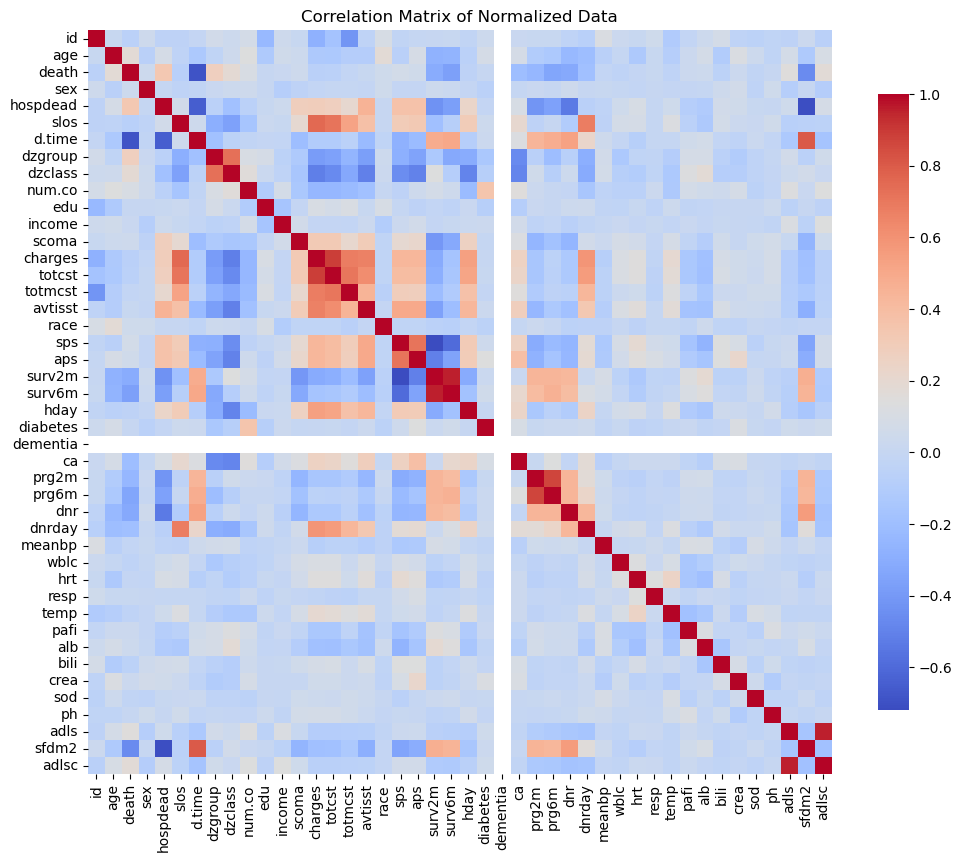

In [25]:
file_path = './csv/normalizedd_data.csv'
data = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Normalized Data')
plt.show()

Plot Outliner Graph of Feature

Skipping column 'dementia' because it has no positive values.


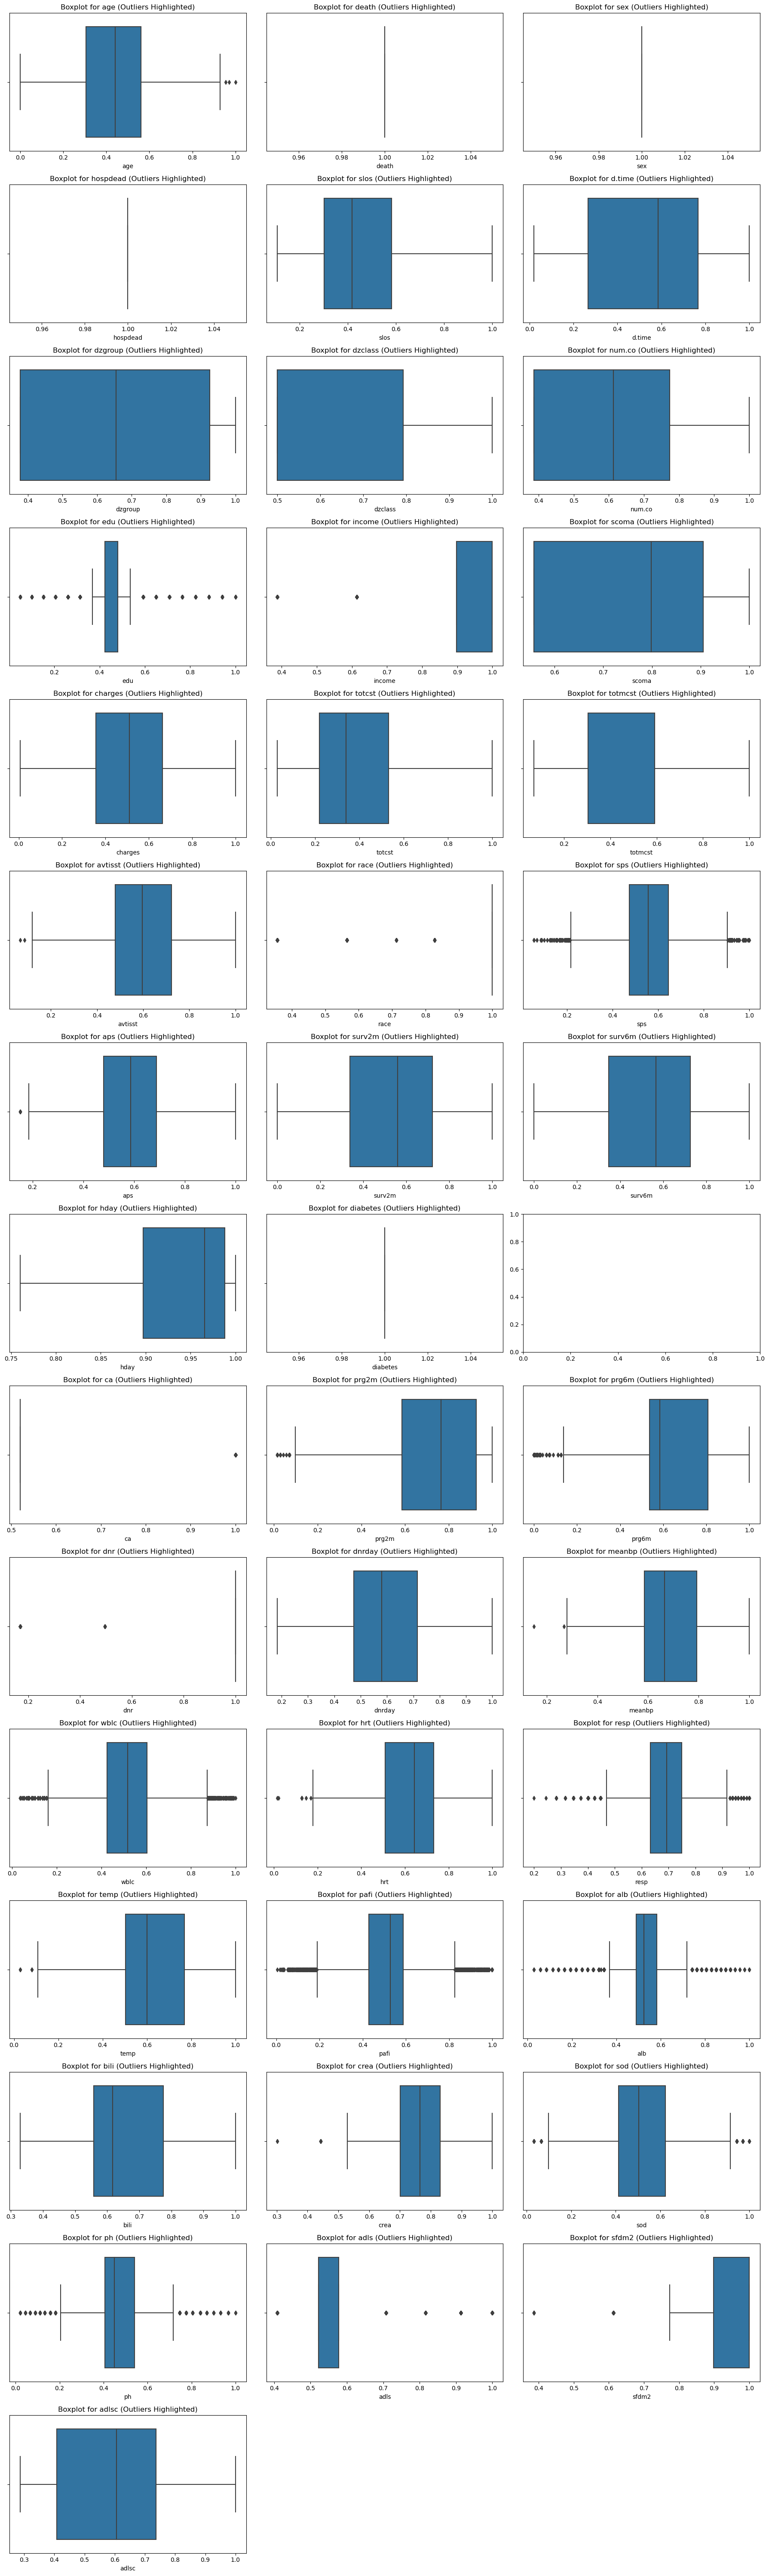

In [26]:
# Columns to apply transformations
columns_to_transform = ['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

# Function to plot outliers
def plot_outliers(column_data, column_name, ax):
    sns.boxplot(x=column_data, ax=ax)
    ax.set_title(f'Boxplot for {column_name} (Outliers Highlighted)')
    ax.set_xlabel(column_name)

# Set the number of rows and columns for subplots
num_columns = len(columns_to_transform)
n_rows = (num_columns // 3) + 1
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop through each column and plot outliers
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        # Filter out non-positive values
        data_filtered = data[data[column] > 0][column]

        if len(data_filtered) > 0:
            # Plot the boxplot for outliers
            plot_outliers(data_filtered, column, axes[i])
        else:
            print(f"Skipping column '{column}' because it has no positive values.")
    else:
        print(f"Column '{column}' not found in the dataset.")

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Preprocessing


In [27]:
file_path = './csv/filled_no_outliner.csv'
df = pd.read_csv(file_path)

X = df.drop('death', axis=1)  # Features
y = df['death']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5.Model Training

Before tuning, it's important to establish a baseline model for comparison. We'll start with:
1. **Random Forest**: An ensemble model that creates multiple decision trees and averages their predictions.
2. **Support Vector Machine (SVM)**: A model that aims to find the optimal boundary separating classes.
3. **Neural Network**: A basic feedforward neural network.

### Random Forest
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

### SVM
1. `C`: Regularization parameter that controls the trade-off between achieving a low training error and a low testing error.
2. `kernel`: Specifies the kernel type to be used in the algorithm (linear, polynomial, etc.).

### Neural Network
1. `hidden_layer_sizes`: Number of neurons in each hidden layer.
2. `activation`: Activation function for neurons (e.g., ReLU, tanh).
3. `learning_rate`: The step size used in updating the weights.



Let's train these models with default hyperparameters:


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("K-Nearest Neighbors (K-NN) Accuracy:", accuracy_score(y_test, knn_pred))

Random Forest Accuracy: 0.8952702702702703
SVM Accuracy: 0.887668918918919
Neural Network Accuracy: 0.8766891891891891
Logistic Regression Accuracy: 0.870777027027027
Decision Tree Accuracy: 0.8766891891891891
K-Nearest Neighbors (K-NN) Accuracy: 0.8108108108108109


# Hyperparameter Tuning Methods 
## 1.Grid Search
### Random Forest (Grid Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [ ]:
# Define the grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2,scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=None, 

### SVM (Grid Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [ ]:
# Define the grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, k

### Neural Network (Grid Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [ ]:
# Define the hyperparameter space for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search_nn = GridSearchCV(estimator=nn,  param_grid=param_grid_nn, cv=5, verbose=2)
grid_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", grid_search_nn.best_params_)
print("Best Score:",grid_search_nn.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init

### Logistic Regression (Grid Search)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.


In [ ]:
# Define the grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'penalty': ['l2'],  
}

# Initialize Grid Search
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, verbose=2, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, sol

### Decision Tree (Grid Search)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [32]:
# Define the grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # None allows the tree to expand until all leaves are pure
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Initialize Grid Search
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[C

### K-Nearest Neighbors (Grid Search) 

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [ ]:
# Define the grid for KNN
param_grid_knn = {
    'n_neighbors': [11, 13, 15, 17],    
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}

# Initialize Grid Search
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=2, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, wei

## 2.Randomized Search
### Random Forest (Randomized Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [ ]:
# Define the hyperparameter space for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=5, verbose=2)
random_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest (Randomized Search):", random_search_rf.best_params_)
print("Best Score:",random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END max_depth=20, min_samples_spl

### SVM (Randomized Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [ ]:
# Define the grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=10, cv=5, verbose=2)
random_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", random_search_svm.best_params_)
print("Best Score:", random_search_svm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.9s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.2s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.1s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale

### Neural Network (Randomized Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.

In [ ]:
# Define the hyperparameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize Randomized Search for Neural Network
random_search_nn = RandomizedSearchCV(estimator=nn, param_distributions=param_dist_nn, n_iter=10, cv=5, verbose=2)
random_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", random_search_nn.best_params_)
print("Best Score:",random_search_nn.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_

### Logistic Regression (Randomized Search)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.

In [ ]:
# Define the hyperparameter space for Logistic Regression
param_dist_lr = {
    'C': [0.1, 1, 10, 100, 1000],              
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'penalty': ['l2']                          
}

# Initialize Randomized Search for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr, n_iter=10, cv=5, verbose=2, scoring='accuracy')
random_search_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", random_search_lr.best_params_)
print("Best Score:", random_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.4s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1000, penalty=l2, 

### Decision Tree (Randomized Search)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [37]:
# Define the hyperparameter space for Decision Tree
param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40],       
    'min_samples_split': [2, 5, 10, 15, 20],   
    'min_samples_leaf': [1, 2, 4, 6, 8]        
}

# Initialize Randomized Search for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, n_iter=10, cv=5, verbose=2, scoring='accuracy')
random_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END max_depth=None

### K-Nearest Neighbors (Randomized Search)

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [39]:
# Define the hyperparameter space for KNN
param_dist_knn = {
    'n_neighbors': [11, 13, 15, 17, 19],         
    'weights': ['uniform', 'distance'],      
    'p': [1, 2]                              
}

# Initialize Randomized Search for KNN
knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_knn, n_iter=10, cv=5, verbose=2, scoring='accuracy')
random_search_knn.fit(X_train, y_train)

# Best hyperparameters for KNN
print("Best Hyperparameters for KNN:", random_search_knn.best_params_)
print("Best Score:", random_search_knn.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=2, wei

## 3. Bayesian Optimization
### Random Forest (Bayesian)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [ ]:
# Define the hyperparameter space for Random Forest
param_space_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Bayesian Search for Random Forest
bayes_search_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space_rf,
    n_iter=10,  # Number of iterations for search
    cv=5,       # 5-fold cross-validation
    verbose=2
)

# Train the Random Forest model using Bayesian Optimization
bayes_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest using Bayesian Optimization
print("Best Hyperparameters for Random Forest (Bayesian):", bayes_search_rf.best_params_)
print("Best Score:", bayes_search_rf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.9s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   3.0s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END

### SVM (Bayesian)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [ ]:
# Define the parameter space for SVM
param_space_svm = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': (1e-6, 1e+1, 'log-uniform')
}

# Initialize Bayesian Search for SVM
bayes_search_svm = BayesSearchCV(estimator=svm, search_spaces=param_space_svm, n_iter=10, cv=5, verbose=2)
bayes_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM using Bayesian Optimization
print("Best Hyperparameters for SVM (Bayesian):", bayes_search_svm.best_params_)
print("Best Score:",bayes_search_svm.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.3s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.4416

### Neural Network (Bayesian)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [ ]:
# Define the hyperparameter space for Neural Network
param_space_nn = {
    'hidden_layer_sizes': Integer(50, 200),
    'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform'),
    'max_iter': Integer(100, 500)
}

# Initialize Bayesian Search for Neural Network
bayes_search_nn = BayesSearchCV(
    estimator=nn,
    search_spaces=param_space_nn,
    n_iter=10,  # Number of iterations for search
    cv=5,       # 5-fold cross-validation
    verbose=2
)

# Train the Neural Network model using Bayesian Optimization
bayes_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network using Bayesian Optimization
print("Best Hyperparameters for Neural Network (Bayesian):", bayes_search_nn.best_params_)
print("Best Score:", bayes_search_nn.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.0s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.1s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.1s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   2.8s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   2.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.8s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.8s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.2s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.2s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.2s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.2s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.3s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.4s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.5s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.5s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.4s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.0059604598442544844, hidden_layer_sizes=175, lea

c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


### Logistic Regression (Bayesian)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.

In [42]:
# Define the hyperparameter space for Logistic Regression
param_space_lr = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),               
    'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear']),  
    'penalty': Categorical(['l2'])                            
}

# Initialize Bayesian Search for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
bayes_search_lr = BayesSearchCV(
    estimator=lr,
    search_spaces=param_space_lr,
    n_iter=10,  # Number of iterations
    cv=5,
    verbose=2,
    scoring='accuracy'
)

# Train Logistic Regression model using Bayesian Optimization
bayes_search_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression using Bayesian Optimization
print("Best Hyperparameters for Logistic Regression (Bayesian):", bayes_search_lr.best_params_)
print("Best Score:", bayes_search_lr.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=16.303468588431492, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=16.303468588431492, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=16.303468588431492, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=16.303468588431492, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=16.303468588431492, penalty=l2, solver=newton-cg; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=12.688757544629622, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=12.688757544629622, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=12.688757544629622, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=12.688757544629622, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=12.688757544629622, penalty=l2, solver=liblinear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

### Decision Tree (Bayesian)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [43]:
# Define the hyperparameter space for Decision Tree
param_space_dt = {
    'max_depth': Integer(5, 50),         
    'min_samples_split': Integer(2, 20),   
    'min_samples_leaf': Integer(1, 10)     
}

# Initialize Bayesian Search for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
bayes_search_dt = BayesSearchCV(
    estimator=dt,
    search_spaces=param_space_dt,
    n_iter=10,
    cv=5,
    verbose=2,
    scoring='accuracy'
)

# Train Decision Tree model using Bayesian Optimization
bayes_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree using Bayesian Optimization
print("Best Hyperparameters for Decision Tree (Bayesian):", bayes_search_dt.best_params_)
print("Best Score:", bayes_search_dt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=46, min_samples_leaf=8, min_samples_split=3; total time=   0.0s
[CV] END max_depth=46, min_samples_leaf=8, min_samples_split=3; total time=   0.0s
[CV] END max_depth=46, min_samples_leaf=8, min_samples_split=3; total time=   0.0s
[CV] END max_depth=46, min_samples_leaf=8, min_samples_split=3; total time=   0.0s
[CV] END max_depth=46, min_samples_leaf=8, min_samples_split=3; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=16, min_samples_leaf=3, min_samples_split=15; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=3, min_samples_split=15; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=3, min_samples_split=15; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=3, min_samples_split=15; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=3, min_samples_split=15; total time=   0.0s
Fitting 5 folds for each of 1 candidates, total

### K-Nearest Neighbors (Bayesian)

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [44]:
# Define the hyperparameter space for KNN
param_space_knn = {
    'n_neighbors': Integer(1, 20),                       
    'weights': Categorical(['uniform', 'distance']),     
    'p': Integer(1, 2)                                   
}

# Initialize Bayesian Search for KNN
knn = KNeighborsClassifier()
bayes_search_knn = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space_knn,
    n_iter=10,
    cv=5,
    verbose=2,
    scoring='accuracy'
)

# Train KNN model using Bayesian Optimization
bayes_search_knn.fit(X_train, y_train)

# Best hyperparameters for KNN using Bayesian Optimization
print("Best Hyperparameters for KNN (Bayesian):", bayes_search_knn.best_params_)
print("Best Score:", bayes_search_knn.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

#  6.Result Analysis (การวิเคราะห์ผลลัพธ์)
### Baseline
**การวิเคราะห์ประสิทธิภาพโมเดล:** ตรวจสอบผลลัพธ์ของโมเดลผ่าน metric ต่าง ๆ

**การประเมิน Bias-Variance Tradeoff:** วิเคราะห์ว่าโมเดลมี bias หรือ variance ที่สูงเกินไปหรือไม่

**การตรวจสอบข้อผิดพลาด (Error Analysis):** ทำความเข้าใจข้อผิดพลาดที่เกิดขึ้นและวิธีการปรับปรุง

**การสร้าง Confusion Matrix (ถ้าเป็น classification):** เพื่อดูอัตราการทำนายผิดพลาด

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

Random Forest Accuracy: 0.8952702702702703
SVM Accuracy: 0.887668918918919
Neural Network Accuracy: 0.8766891891891891


### Grid Search
**การวิเคราะห์ประสิทธิภาพโมเดล:** ตรวจสอบผลลัพธ์ของโมเดลผ่าน metric ต่าง ๆ

**การประเมิน Bias-Variance Tradeoff:** วิเคราะห์ว่าโมเดลมี bias หรือ variance ที่สูงเกินไปหรือไม่

**การตรวจสอบข้อผิดพลาด (Error Analysis):** ทำความเข้าใจข้อผิดพลาดที่เกิดขึ้นและวิธีการปรับปรุง

**การสร้าง Confusion Matrix (ถ้าเป็น classification):** เพื่อดูอัตราการทำนายผิดพลาด

In [ ]:
print("Random Forest Accuracy:", grid_search_rf.best_score_)
print("SVM Accuracy:", grid_search_svm.best_score_)
print("Neural Network Accuracy:",grid_search_nn.best_score_)

Random Forest Accuracy: 0.8922445644530071
SVM Accuracy: 0.8698458021436337
Neural Network Accuracy: 0.8719595205511563


### Randomized Search
**การวิเคราะห์ประสิทธิภาพโมเดล:** ตรวจสอบผลลัพธ์ของโมเดลผ่าน metric ต่าง ๆ

**การประเมิน Bias-Variance Tradeoff:** วิเคราะห์ว่าโมเดลมี bias หรือ variance ที่สูงเกินไปหรือไม่

**การตรวจสอบข้อผิดพลาด (Error Analysis):** ทำความเข้าใจข้อผิดพลาดที่เกิดขึ้นและวิธีการปรับปรุง

**การสร้าง Confusion Matrix (ถ้าเป็น classification):** เพื่อดูอัตราการทำนายผิดพลาด

In [ ]:
print("Random Forest Accuracy:",random_search_rf.best_score_)
print("SVM Accuracy:", random_search_svm.best_score_)
print("Neural Network Accuracy:",random_search_nn.best_score_)

Random Forest Accuracy: 0.8926678439313196
SVM Accuracy: 0.8698458021436337
Neural Network Accuracy: 0.8711134080918713


### Bayesian Search
**การวิเคราะห์ประสิทธิภาพโมเดล:** ตรวจสอบผลลัพธ์ของโมเดลผ่าน metric ต่าง ๆ

**การประเมิน Bias-Variance Tradeoff:** วิเคราะห์ว่าโมเดลมี bias หรือ variance ที่สูงเกินไปหรือไม่

**การตรวจสอบข้อผิดพลาด (Error Analysis):** ทำความเข้าใจข้อผิดพลาดที่เกิดขึ้นและวิธีการปรับปรุง

**การสร้าง Confusion Matrix (ถ้าเป็น classification):** เพื่อดูอัตราการทำนายผิดพลาด

In [ ]:
print("Random Forest Accuracy:", bayes_search_rf.best_score_)
print("SVM Accuracy:",bayes_search_svm.best_score_)
print("Neural Network Accuracy:", bayes_search_nn.best_score_)

Random Forest Accuracy: 0.8909767352560996
SVM Accuracy: 0.8664660405285636
Neural Network Accuracy: 0.8723834697754789


# Plot ROC Graph

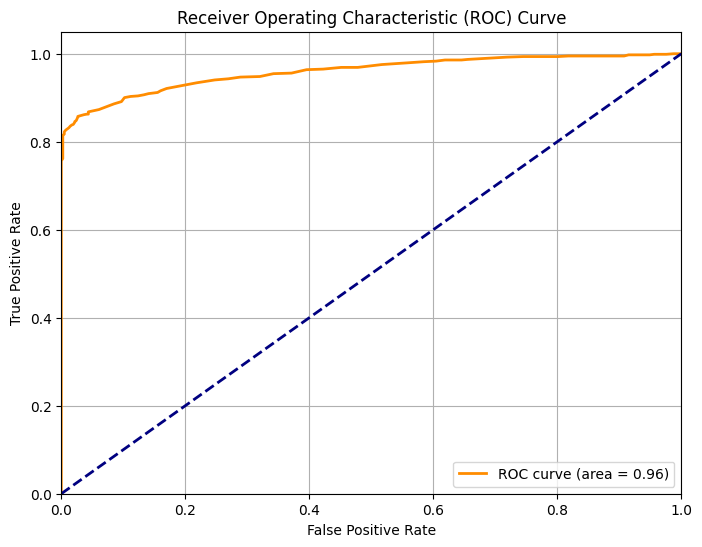

In [ ]:
# Baseline Random Forest is best case 
best_model = rf

# Get the predicted probabilities for the positive class (1)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix

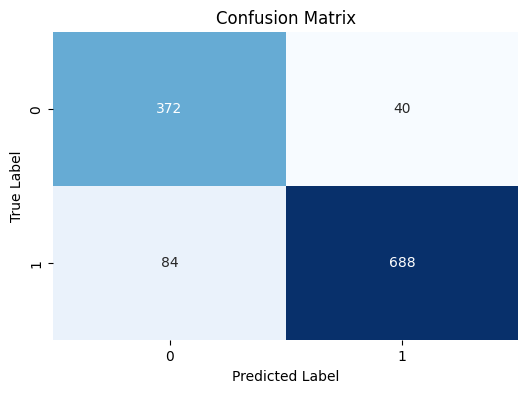

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

 # 7.Model Discussion (การอภิปรายเกี่ยวกับโมเดล)
